In [1]:
# from gensim.models import TfidfModel
# from gensim.corpora import Dictionary
# from gensim import similarities
from gensim import corpora, models, similarities


/Users/oooyyyzzz/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import pandas as pd
import numpy as np
import json
# Opening JSON file
f = open('data.json',)
  
# returns JSON object as 
# a dictionary
data = json.load(f)

# Closing file
f.close()

In [13]:
sample_data = {'204f5d99-c9de-4bce-ae2f-5e98085b4930': {'url': 'https://gazette.com/election-coverage/q-a-s-with-the-colorado-gubernatorial-candidates/article_37967414-d940-11e8-986a-972c594bffd9.html',
  'source': 'gazette',
  'credibility': 'medium',
  'domain': 'gazette.com',
  'text': 'Here are answers to questions we sent to all four major- and minor-party governor candidates in November’s election.\n\nBill Hammons, Unity Party\n\nLt. Gov. running mate: Eric Bodenstab\n\nWhat makes you a better choice than your opponents?\n\nI’m the best choice for the simple reason that I’m truly something new under the sun (for once). I founded (with my father) the now-38-state Unity Party of America the day after the 2004 Election, and founded the Unity Party of Colorado by personally gathering well over 1,000 valid voter signatures in multiple statewide races, placing myself as a Unity Party candidate on the General Election ballot. Those 1,000 signatures put the Unity Party on the voter registration form as the “Unity” option, and the 1,000 voters who subsequently affiliated with “Unity” put UP into official party status in Colorado.\n\nRank in priority the top three issues you want to work on, and explain your first choice.\n\nColorado can and should lead the way as a state example in fighting climate change, in providing all citizens (through Medicare-inspired means) with the health care they need and deserve, and in growing and developing a sustainable economy. Climate change and its effects are real, are man-made, are a real threat, and can be fought. We need to move our state’s taxation system away from punishing workers for feeding their families, and towards discouraging destructive behavior of all kinds. Such a system would be a more efficient and constructive model for the national sales tax long advocated by many conservatives.\n\nThe Taxpayer’s Bill of Rights, or TABOR, gets a lot of criticism. Does it need fixing?\n\nTABOR doesn’t need fixing; it needs replacing with laws that better respect and acknowledge the intelligence of voters. Telling local governments what they can and cannot do with their own revenues is inappropriate (note that I oppose some forms of local taxation on principle, but to effectively tell local voters how much they choose to legally tax themselves is like outlawing exercise). The approval of TABOR implies that the lawmakers representing the two-party duopoly (and not representing their constituents) cannot be trusted to productively spend money, and I wholeheartedly agree; it’s time to finally outlaw gerrymandering at all legislative levels.\n\nScott Helker, Libertarian Party\n\nLt. Gov. running mate: Michele Poague\n\nWhat makes you a better choice than your opponents?\n\nThe biggest difference is that I do not think of government as having the only solutions. Because I do not put myself in a box where only 10 percent the solutions are, I am free to explore the other 90 percent of the solutions that are available.\n\nRank in priority the top three issues you want to work on, and explain your first choice.\n\nMy three issues begin with water. The solutions put forward by both Mr. Stapleton and Mr. Polis will not increase the volume of water in the Colorado river basins or refill the aquifers in Colorado and by default the aquifers in the surrounding states.\n\nThe Taxpayer’s Bill of Rights, or TABOR, gets a lot of criticism. Does it need fixing?\n\nTABOR does not need fixing! Not because there is unjustified criticism of TABOR, but because what choice do we have? Puerto Rico has already declared bankruptcy. In the next decade Illinois, California and New York must follow. Worse, how long before we must pay off the 21 trillion dollars of Federal debt, and how? Until we can elect legislators to the State Assembly and Senate who are fiscally responsible, TABOR will need to stay in place as is! In fact, I would encourage the other 49 states and the Federal Government to pass TABOR-like amendments so that their economies could be as strong as Colorado’s, and they would not need to file bankruptcy.\n\nJared Polis, Democrat\n\nLt. Gov. running mate: Dianne Primavera\n\nWhat makes you a better choice than your opponents?\n\nI’ve started businesses, created hundreds of jobs, and built schools for at-risk youth. I’m especially proud to have helped launch Patriot Boot Camp, a mentorship program that has helped veterans and military families launch their own small businesses. My 100-day health care plan will reduce premiums, stop prescription price gouging, and expand access to quality care across Colorado. Walker Stapleton has said he will roll back the Medicaid expansion and get rid of Colorado’s health exchange — throwing hundreds of thousands of Coloradans off their insurance and driving up costs for the rest of us.\n\nRank in priority the top three issues you want to work on, and explain your first choice.\n\n1) Tackling the rising cost of living so Coloradans can afford to live and raise their families here\n\n2) Building a world-class public education system\n\n3) Expanding access to high-quality affordable health care\n\nFar too many Coloradans today feel like they can’t get ahead despite our booming economy. Paychecks have barely budged, but between housing, health care, school, and daycare, the cost of living has gotten out of control. We need to build a Colorado economy where people can not just get by, but thrive — whether it’s the farmer whose livelihood is in danger due to drought, the young professional whose income isn’t keeping up with the rent, or the parents struggling to pay their health premium on top of the staggering cost of preschool.\n\nThe Taxpayer’s Bill of Rights, or TABOR, gets a lot of criticism. Does it need fixing?\n\nAny reforms to TABOR will have to be done in a bipartisan way. I would oppose changing the provision in TABOR that gives voters a say over new taxes. As governor, I will convene Republicans, Democrats and the business community to fix the growth formula and provide more flexibility so that we can invest in important priorities like public schools and transportation.\n\nWalker Stapleton, Republican\n\nLt. Gov. running mate: Lang Sias\n\nWhat makes you a better choice than your opponents?\n\nI believe my track record of working in a bipartisan way to defend the taxpayers of Colorado puts me in the best position to serve as our next governor. Just two years ago, former Democratic Governor Bill Ritter and I were co-chairs of the effort to defeat Amendment 69. This disastrous plan for a government-run, single-payer health care scheme was defeated with nearly 80 percent of the population joining us and voting no. My opponent has embraced this policy for rationed, low-quality health care. His plan for single-payer health care, along with his plan for 100 percent renewable energy are simply too expensive and too radical for Colorado.\n\nRank in priority the top three issues you want to work on, and explain your first choice.\n\nMy top priorities are: health care, transportation, and attainable housing. All of these issues boil down to a single concern; managing our growth. Colorado is in the midst of an economic boom, but this boom has come with negative side effects that impact everyone in our state. With the hundreds of thousands of new residents have come deteriorating roads and skyrocketing price increases for housing and health care. These factors are detracting from our quality of life and eating into the economic gains that we have seen from our growth. We must solve our transportation woes without raising taxes.\n\nThe Taxpayer’s Bill of Rights, or TABOR, gets a lot of criticism. Does it need fixing?\n\nI believe that TABOR has been a critical component to our state’s economic growth since it became part of Colorado’s Constitution. Every household must balance their own budget and I think it is critical that our state government does the same. Giving voters a voice in how much of their hard-earned dollars government can take and spend is a safeguard against out-of-control tax and spend policies that have overrun states across the country. This amendment has created a government that is more accountable and responsive to the will of taxpayers.'},
 '0526bd0d-41bb-43fe-bdc9-dabeea9dcfaa': {'url': 'https://news.abs-cbn.com/news/05/04/20/senate-passes-alternative-learning-system-act-to-boost-education-for-marginalized-sectors',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'MANILA - The Senate on Monday passed on third reading the Alternative Learning System, which allows out-of-school youth, persons with disabilities, indigenous peoples, and other underserved communities to receive education "tailored to respond to their learning needs and life circumstances."\n\nTwenty-two senators voted in favor of Senate Bill No. 1365, which sought to "guarantee equitable opportunity for all learners."\n\n"The ALS Act is, in its very essence, a bill about second chances," said principal author Sen. Sherwin Gatchalian in a statement.\n\n"It is a bill about providing opportunities for a better life to our fellow Filipinos who have fallen into hard times,” said the senator, who chairs the Senate Committee on Basic Education Arts and Culture.\n\nUnder the measure, all cities and municipalities will be required to have at least 1 ALS center that would provide "a mix of learning modalities" such as "digital learning, modular instruction, and radio and television-based instruction."\n\nThe system is also useful now that the Education sector needs to adapt to a new normal during the coronavirus disease 2019 (COVID-19) pandemic, Gatchalian said.\n\nInstitutionalizing a mix of learning modules will "help ensure the safety of learners," he said.\n\nThe Act also expands the recruitment program for ALS teachers to ensure that the system would reach far-flung communities in need of education.\n\nUnder the policy, the national government "shall create teaching positions and allocate the corresponding salary grades."\n\n"The CHED shall likewise develop a standardized and formalized ALS curriculum for a specialized degree in ALS teaching," it said.\n\n"Measures shall be undertaken in order for the general public, especially educational and training institutions, government agencies, and employers to recognize the nature and value of certifications provided to ALS learners."\n\nThe bill also creates the Bureau of Alternative Education (BAE), an office which was dissolved 2016 after its functions were integrated in other bureaus of the Department of Education.\n\nBefore the Senate passed the ALS bill into law, at least 738,929 learners were already enrolled in the system, according to data from Gatchalian\'s office.'},
 '33e5aa3f-af33-461d-9e51-16a552e6b985': {'url': 'https://news.abs-cbn.com/news/04/30/20/de-lima-decries-foul-and-unfair-exclusion-from-senates-online-sessions',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'MANILA (UPDATE) - Detained Sen. Leila de Lima on Thursday decried the Senate leadership\'s decision to disallow her from joining the chamber\'s virtual sessions next week, describing it as "petty politics" that is "foul and unfair."\n\nSenate President Vicente Sotto III earlier said that De Lima, who has been detained due to drug charges since February 2017, may not be able to participate in online sessions as she remains under the jurisdiction of the judiciary and the Philippine National Police (PNP).\n\n"The decision of the Senate leadership to exclude me from participating in Senate sessions via teleconferencing, under amended rules to be adopted, is nothing but a continuation of this administration’s efforts to silence me and prevent me from fully performing my duties as a senator," De Lima said in a statement.\n\n"Foul and unfair! This is petty politics," said De Lima, a staunch administration critic who has long denied drug charges against her, saying they were part of political persecution.\n\nDe Lima said Sotto\'s reason for her exclusion in the planned online session was "completely and absolutely misinformed."\n\n"The ruling of the Supreme Court on this matter is clear. The only limitation brought about by my detention is my mobility and ability to travel," she said.\n\n"As long as I stay in the detention center, there is nothing that prevents me from performing my job as a duly-elected Senator. The jurisdiction of the court is not affected by my participation in Senate hearings via electronic means," she said.\n\nDe Lima said her participation in the virtual sessions would not have been questioned had she been part of the majority bloc.\n\n"I reckon that if I were not a member of the opposition there would have been no ifs and buts in allowing me to participate remotely, just like everybody else, under the proposed new rules," she said.\n\nUnder Senate rules, at least half of the legislative body needs to be physically present before the chamber can declare a quorum and begin its floor discussions.\n\nAt least 15 senators earlier agreed to amend the Senate rules to allow online conferences as several areas remain under enhanced community quarantine to curb the spread of the coronavirus disease 2019 (COVID-19), leaving some lawmakers stuck in their home provinces and others wary of contracting the virus.\n\n"If my colleagues really believe in the role of the Senate in our democracy, I should be allowed to participate regardless of my political affiliation and views," De Lima said.\n\n"Malinaw na ayaw lang talaga ng mga nasa kapangyarihan na ipalahok ako sa mga deliberasyon sa Senado. Kung ayaw, maraming dahilan. Kung gugustuhin, hahanap ng paraan... And they say there’s no persecution in my case. Really?" she said.\n\n(It\'s clear that those in power just don\'t want me to be part of Senate deliberations. If you don\'t won\'t something to happen, you find many reasons. If you want it to happen, you find a way to make it happen.)\n\nSENATE LEADERSHIP CITES JURISPRUDENCE\n\nThe Senate leadership\'s decision to exclude De Lima from virtual proceedings was based on the actions of the Senate in previous Congress sessions, Sotto told reporters in a text message.\n\nSotto said he had asked the chamber to allow former senators Juan Ponce Enrile, Jinggoy Estrada and Ramon "Bong" Revilla Jr. to join Senate sessions virtually while they were detained for allegedly pocketing billions-worth of discretionary funds through ghost non-government organizations.\n\n"I was in the minority then and I was asking that they be allowed [to join Senate sessions while detained] and what I said earlier was the response given to me," Sotto said.\n\n"As the saying goes, \'The sauce for the goose is the sauce for the gander,\'" he said.\n\nSenate Majority Leader Juan Miguel Zubiri backed Sotto\'s statement, citing earlier Supreme Court decisions that barred lawmakers from performing their functions as Congress members while in detention.\n\n"In the case of Jalosjos, the Supreme Court ruled that Jalosjos cannot be allowed to attend to his duties as lawmaker by allowing him to participate in congressional sessions and hearings," Zubiri said in a separate text message, referring to former Zamboanga del Norte Rep. Romeo Jalosjos who was convicted for rape.\n\n"To do so would violate principle of equal protection clause enshrined in our Constitution," the Senate Majority Leader said.\n\n"These are not my opinions but that of the court. Our dear colleague may appeal these rulings from the court and if her request is granted then we will comply," he said.\n\nDe Lima has been detained at the PNP detention facility at its headquarters in Camp Crame, Quezon City for over 3 years for her alleged involvement in the drug trade at the national penitentiary during her stint as Justice Secretary.\n\nDe Lima has repeatedly denied the allegations, insisting she was detained for being a vocal critic of President Rodrigo Duterte and his intensified campaign against illegal drugs.\n\nJustice Secretary Menardo Guevarra earlier said that De Lima has yet to apply for bail.\n\n"She has questioned many orders of the court, even her own indictment which reached all the way to the Supreme Court, which the petition was dismissed by the Supreme Court, but she has not applied for bail," Guevarra told ANC in a January 2020 interview.\n\n"If you think that the evidence of the prosecution is weak, if you\'re the accused you would probably consider filling a petition for bail. But she has not done so," he said.'},
 'd10f9f69-204a-422d-886d-ff59f787fe22': {'url': 'https://news.abs-cbn.com/overseas/04/29/20/taiwan-rejects-call-for-deportation-of-pinay-caregiver',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'Honor guards perform Taiwan national flag lowering ceremony at Liberty Square, as the spread of the coronavirus disease (COVID-19) continues, in Taipei, Taiwan, April 1, 2020. Ann Wang, Reuters\n\nMANILA – Taiwan’s foreign ministry has dismissed the call for the deportation of a Filipina caregiver over her online criticism on the Philippine government’s response to the coronavirus disease 2019 (COVID-19) pandemic.\n\nAccording to a report from Taiwan News Online, the Ministry of Foreign Affairs (MOFA) maintained that foreign workers enjoy freedom of speech in the country.\n\n"Taiwan is a sovereign, independent country where foreign workers enjoy \'citizen treatment,\' and their rights and interests are protected by relevant laws and regulations, including freedom of speech, which should be respected by governments of all countries," the MOFA said.\n\n“No person or institution, in this case, has the right to pressure her, her employer, or broker, nor shall she be deported without consultations held between both governments,” it added.\n\nThe Philippine representative to Taipei earlier said Manila has not formally requested the deportation of the Filipina caregiver.\n\nAngelito Banayo, chairman and resident representative of the Manila Economic and Cultural Office (MECO), said the order for deportation is a sovereign right of the Taiwanese government.\n\n“The question of deportation is something that only the Taiwanese government can decide upon," he said in an interview with Taiwan\'s Central News Agency (CNA).\n\nFidel Macauyag, labor attaché of the Philippine Overseas Labor Office (POLO) in Taichung City, has alleged that the woman was using multiple social media accounts and participated in a group "organized to discredit and malign the President and destabilize the government."\n\nHe said his office had coordinated with the worker\'s broker and employer on her deportation on her supposed offense under Philippine law, claiming that sharing and posting of such videos are punishable under cyber libel under Republic Act 10175 or the Cybercrime Prevention Act of 2012.\n\nThe Commission on Human Rights (CHR) has sounded alarm over the POLO’s move. POLO is an attached agency of the Department of Labor and Employment that seeks the protection and welfare of OFWs.\n\nCHR spokesperson Jacqueline Ann de Guia stressed that labor offices abroad exist primarily to protect migrant workers who may run into trouble as they try to provide better livelihood for their families back in the Philippines.\n\nShe also reiterated that Filipinos\' "freedom of speech, of expression, or the right of the people to petition the government for redress of grievance" are guaranteed in Bill of Rights of the 1987 Constitution.'},
 '88ffc85f-b495-4f59-af53-08a92030f9b7': {'url': 'https://news.abs-cbn.com/news/04/27/20/sc-petitioners-refute-osg-covid-19-cases-in-jails-show-inability-to-prevent-virus-spread',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'MANILA – Citing the rising number of coronavirus disease (COVID-19) cases in jails, political prisoners who urged the Supreme Court for their temporary release refuted the claim of the Office of the Solicitor General (OSG) that the Philippine government is doing enough to prevent the spread of the virus.\n\nSC petitioners hit OSG\'s "malicious conjectures," "deep-seated cynicism" and "callous disregard for human dignity" in accusing them of being high-ranking members of CPP-NPA-NDF and in claiming PH govt can provide medical care to #COVID19 patients despite contrary evidence. — Mike Navallo (@mikenavallo) April 27, 2020\n\nPetitioners cited COVID-19 cases at the Quezon City Jail, including a QC Jail inmate who died without having been tested for the coronavirus; Correctional Institute for Women; Cebu City Jail; and, New Bilibid Prison, which recently recorded its first confirmed COVID-19 death.\n\n“The existence of the foregoing confirmed and suspected cases shows the inability of prison authorities to prevent the transmission of the disease,” they said in their Reply filed Monday in response to the OSG’s Comment on Friday.\n\nQuoting the Department of the Interior and Local Government, the OSG had argued the inmates are safer inside jails and listed the steps taken by government agencies in response to the threat of the pandemic, including the setting up of quarantine facilities.\n\nBut petitioners pointed out that despite the lockdowns imposed in jails since March, the virus still spread.\n\nAs of Monday afternoon, ABS-CBN News counted 280 inmates and jail staff across the country as having tested positive for the virus:\n\nNew Bilibid Prison – 1 inmate (dead)\n\nCorrectional Institution for Women – 48 inmates, 1 staff\n\nQuezon City Jail – 9 inmates, 9 staff\n\nCebu City Jail – 212 inmates and staff (including 1 inmate dead).\n\nPetitioners added, even under ordinary circumstances, “Philippine prisons, in general, are not equipped with adequate medical and healthcare facilities and human resources to respond to the basic needs of the inmates.”\n\nAcknowledging the lack of rules governing treatment of inmates during public health emergencies, petitioners asked the high court to use equitable grounds.\n\n“Equity should fill the gaps of the law, with technicalities giving way to the extremely difficult realities of petitioners‘ situation,” they said.\n\nNO VIOLATION OF EQUAL PROTECTION\n\nThe inmates also denied the OSG’s claim that granting the inmates’ release will violate the equal protection clause, citing substantial distinction between them and other inmates on account of their age, health and status.\n\nMost of the 22 petitioners are aged 55 years old and above with underlying medical conditions. One inmate has leprosy while another is pregnant.\n\nPetitioners added, they filed their petition not just for themselves but also for others who are similarly-situated.\n\nIt is ironic, the inmates said, for the OSG to accuse them of violating the equal protection clause only to claim that the Enrile ruling only applies to the case of former Senator Juan Ponce Enrile.\n\nSC allowed Enrile to post bail in 2015 because of his failing health and because he was not considered a flight risk due to his social and political status and his immediate surrender.\n\n“The respondents failed to justify why the petitioners, who are elderly and with failing health should not benefit from the ruling in Enrile,” they said.\n\nPETITIONERS NOT THE ENEMY\n\nPetitioners strongly rejected the OSG’s accusation that allegedly all members of the Communist Party of the Philippines-New Peoples’ Army-National Democratic Front (CPP-NPA-NDF) are taking advantage of the pandemic to be set free.\n\nThey called out the OSG’s attempt to paint them as high-ranking officers of “communist terrorist groups” undeserving of compassion and mercy.\n\n“Aside from being execrable discharges of malicious conjectures, they readily reveal a deep-seated cynicism and callousness not only with respect to the humanitarian considerations of the law, but also to the capacity of this Honorable Court to devise carefully crafted mechanisms aimed at adhering to the imperatives of human compassion and international law principles while preserving its jurisdiction over the subjects of legal processes,” they said.\n\n“The enemy is COVID-19 and not the petitioners,” they added.'},
 '6c0221c9-f3c9-4f6b-800e-685e75b317c1': {'url': 'https://news.abs-cbn.com/news/04/16/20/some-manila-residents-breach-covid-19-rules-due-to-lack-of-space-isko',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'Watch more on iWantTFC\n\nMANILA - Some residents of illegal settlements in the Philippine capital cannot practice physical distancing to avoid catching COVID-19 due to "lack of space", Manila Mayor Isko Moreno said Thursday.\n\nThe city is the most densely populated area in Metro Manila, with 70,000 people per square kilometer, double than most of its neighbors, said Moreno.\n\nIn Manila\'s inner roads, bay and riverside areas, most houses are packed with 3 or 4 families, he said.\n\n"Iyong social distancing is one of the challenges... Some of them (residents) continue to violate the quarantine and social distancing because of lack of space," Moreno told DZMM.\n\nManila as of Wednesday had 484 cases of COVID-19, with 30 deaths and 15 patients who recovered, according to the health department\'s website.\n\n\n\n\n\nAuthorities arrested residents who joined a recent illegal cockfighting match despite the lockdown. The city also locked down the Parola compound for 24 hours to test residents for the novel coronavirus after some of them joined a bingo game and a boxing match, said Moreno.\n\n\n\n"Ang taumbayan, sana makiisa. Alam kong nayayamot na sila, nagmumukmok na sila, gusto na nila mag-normalize. Pero we have to pay the price, magkaunting sakripisyo lang," he said.\n\n(I hope the public will cooperate. I know they\'re irked, feeling down, they want the situation to normalize. But we have to pay the price, sacrifice a little)'},
 'e10be83f-75b7-40f8-b041-5bbb9f3f6d77': {'url': 'https://news.abs-cbn.com/spotlight/04/16/20/will-we-die-hungry-a-teeming-metro-manila-slum-chafes-under-lockdown',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'A barricade with a placard that reads "extreme enhanced community quarantine" blocks a street from outsiders to protect a neighbourhood from the spread of coronavirus disease (COVID-19) in Quezon City. Eloisa Lopez, Reuters\n\nMANILA, Philippines — Even before the coronavirus arrived in Metro Manila, a saying in the capital’s sprawling San Roque slum — “No one dies from a fever” — crystallized the many threats that its residents faced in their daily lives.\n\nDrug-fueled petty crime. Food shortages. Overcrowding and poor sanitation. Fever, body aches and coughs were commonplace long before the virus came.\n\nPresident Rodrigo Duterte’s lockdown of Luzon, the Philippines’ largest island and home to Manila, is moving into its second month, plunging San Roque’s people even deeper into poverty as the virus continues to rage. Yet the restrictions have not stopped runny-nosed children from playing tag in the slum’s labyrinth of alleyways as parents shout halfhearted admonitions to stay away from one another.\n\nHome to roughly 6,000 families — conservatively, about 35,000 people — San Roque, in Manila’s northern suburb of Quezon, has for years been home to some of the poorest people on the fringes of Philippine society.\n\nMany of the men are day laborers who work at construction sites in the ever-expanding metropolis. Others are provincial migrants whose journeys took them to the slum’s squalid shanties, made from dilapidated cardboard and rusting iron sheet roofing.\n\n“Now it is a nightmare for people like us,” said Susana Baldoza, a grandmother of four who has lived nearly half her 59 years in San Roque, subsisting on odd jobs. “Now that there is a lockdown, we can’t go outside to look for jobs, to survive.”\n\nShe said she does not doubt that the virus is a killer but believes that many are likelier to die of hunger because government aid has been slow to trickle in. Now neighbors are helping neighbors as the community turns inward to feed its poorest residents.\n\nResidents of Sitio San Roque in Quezon City are arrested by police after refusing to disperse and go home when they gathered along the EDSA service road in the area during the Luzon lockdown on April 1, 2020. The residents say they only gathered to ask for help and food as they have yet to receive the promised aid from the local government. Zhander Cayabyab, ABS-CBN News/file\n\nFrustration over the lockdown recently exploded into violence. An April 1 gathering in San Roque became an impromptu rally, with dozens taking to the streets demanding answers from the government about when they would receive promised relief.\n\nPolice officers in riot gear and fatigues responded with force, scuffling with protesters and sending 21 people to jail. Duterte accused Kadamay, a group that advocates for the poor, of inciting the violence and warned that his government would not be lenient toward those who challenged it.\n\n“Now is the time to set an example to everybody,” Duterte said, telling police to “shoot them dead” if they believed protesters were endangering their lives. “I am not used to being challenged. Not me. Let this be a warning to all.”\n\nSo far, there have been no confirmed cases of the coronavirus in San Roque, although Baldoza is almost sure that residents have been infected.\n\n“I pray to God that there won’t be any, but how could there be none?” she said.\n\nAs of Wednesday, 349 people had died in the Philippines from COVID-19, the disease caused by the virus, and 5,453 infections had been confirmed. But that figure is likely to rise sharply, with the Philippine government having just begun mass testing this week.\n\nCommunity leaders in San Roque have been tacking up cardboard signs reminding people not to spit. Some people have started wearing face masks, but most don’t. Wearing them in the city’s stifling heat can be suffocating, some said; others said they would rather spend what little money they had on food.\n\nYumi Castillo, a volunteer social worker with Kadamay, said it was hard to explain the concept of social distancing to people who spend their lives crammed into small, makeshift spaces.\n\nHer group had printed out information about the virus for volunteers to distribute. But judging from the many children playing in congested alleyways and streets, the message didn’t seem to be getting through.\n\n“There are practically no health services here. No one teaches them,” Castillo said at a community center where rice, food, drinking water and rubbing alcohol were sorted and stored.\n\nBaldoza, the grandmother of four, was volunteering as a cook for a community kitchen in San Roque, serving fried herring over rice, courtesy of the Catholic Church and a civic group that has been helping residents weather the crisis.\n\n“People here are very poor, as you can see,” said Baldoza, frying fish outdoors in a wok. “We don’t have money and the luxury of going to the supermarkets. We haven’t received help from the government, no help from the outside, except the donations that they give us. And people can’t work.”\n\nHer neighbor Analyn Mikunog was waiting for the food to be served. Mikunog’s partner has no permanent job, although sometimes he is lucky enough to find work on construction sites. He had just been hired as a day laborer when Duterte imposed the lockdown.\n\nNow the family’s future is bleak. With four young children to feed, the gaunt-looking Mikunog, 28, said she was at her wits’ end trying to figure out how they would survive.\n\n“Sometimes we talk and wonder how long this lockdown will last,” she said. “Will we die hungry?”\n\nPriests in clerical collars and rugged jeans were busily making lunches, but their camaraderie belied the seriousness of the situation. As the meals were being prepared, riot police officers moved in to break up the feeding program. They accused leftist organizations of using it to recruit people to campaign against the government.\n\nThe officers, some in black uniforms and others in combat fatigues, carried batons and long firearms. They confiscated signs that read, “Help, Not Jail.” After tense negotiations, a commander, who refused to identify himself, finally relented. But he warned the group to break up after the food was distributed and to practice social distancing.\n\n“We are just serving the people,” said King Garcia, a 39-year-old priest.\n\n“The government has left them in the fringes at a time when they needed help the most,” he said. “If the virus does not kill them, hunger will.”'},
 'd65803ad-3800-4a16-b02b-fef589314fab': {'url': 'https://news.abs-cbn.com/news/04/08/20/seeking-compassion-detainees-ask-sc-for-temporary-release-amid-covid-19-threat',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': "JUST IN: A group of political prisoners and detainees who are elderly and sick files a petition urging SC to order their temporary release amid the threat of the spread of #COVID19 in congested jails. They are represented by relatives, lawywers from PILC, NUPL. pic.twitter.com/4axcnpCrhy — Mike Navallo (@mikenavallo) April 8, 2020\n\nMANILA – Twenty-two inmates from different jails in Metro Manila urged the Supreme Court Wednesday to allow their temporary release as they faced the threat of the coronavirus disease 2019 (COVID-19) spreading in crowded jails.\n\n\n\nThe inmates -- political prisoners and detainees who are elderly, sick or pregnant -- cited their vulnerability to contract the virus, invoking compassion and humanitarian considerations.\n\n\n\n“Petitioners are praying for a fair chance at surviving the devastating impact of the COVID-19 outbreak in spaces that are not blighted with overcrowding and lack of access to hygiene measures and medical care,” they said in their petition.\n\n\n\n“If the Honorable Court has applied equity to prevent unjust enrichment or to afford litigants full ventilation of their causes, it can certainly do the same for a far more persuasive reason: to extend the humanity of the law to petitioners amidst the raging pandemic,” they added.\n\nAmong the petitioners are National Democratic Front of the Philippines consultants Rey Claro Casambre, Vicente Ladlad, Renante Gamara, Francisco Fernandez, Jr. and Adelberto Silva.\n\n\n\nThe other petitioners are:\n\n\n\nDionisio Almonte, peasant organizer\n\nIreneo Atadero, Jr., labor union organizer\n\nAlexander Ramonita Birondo, suspected Communist Party of the Philippines leader\n\nWinona Marie Birondo, suspected CPP leader\n\nFerdinand Castillo, activist\n\nEdiesel Legaspi, agriculturist and organic farmer\n\nAlberto Villamor\n\nVirginia Villamor\n\nCleofe Lagtapon\n\nGeann Perez\n\nEmmanuel Bacarra, alleged NPA commander\n\nOliver Rosales, former government workers' organizer\n\nNorberto Murillo, peasant leader\n\nReina Mae Nasino, Bayan Muna activist\n\nDario Tomada, peasant leader\n\nOscar Belleza, peasant leader\n\nLilia Bucatcat, former peasant organizer in Samar\n\n\n\nAll, except for Bucatcat, are still undergoing trial waiting for their sentence.\n\n\n\nThey are facing varying charges ranging from illegal possession of firearms to murder charges over their alleged involvement in the supposed NPA purge in the late '80s, a mass grave from which was discovered in Inopacan, Leyte in 2006.\n\n\n\nRECOGNIZANCE OR BAIL\n\n\n\nThe inmates asked the high court to grant their release either through recognizance or by posting bail.\n\n\n\nRecognizance is a mode of securing the release of arrested or detained persons who cannot post bail due to poverty by entrusting them to the custody of qualified members of the barangay, city or municipality.\n\n\n\nRelying on a previous Supreme Court decision allowing former Sen. Juan Ponce Enrile to post bail on humanitarian grounds, the inmates said they are also not flight risks as they are “old, frail and sickly, and unlike Enrile, do not have the resources to evade trial by fleeing especially during the enhanced community quarantine being strictly imposed.”\n\nEnrile, released in 2015, is facing trial for supposedly non-bailable plunder charges for his alleged role in the multibillion-peso Priority Development Assistance Fund scam.\n\n\n\nThe inmates also asked the SC to create a prisoner release committee to study and implement the release of all other prisoners and for the Court to issue ground rules on the release of eligible prisoners.\n\n\n\nNamed as respondents are the People of the Philippines, the heads of the Interior and Justice departments, the Jail Management and Penology and Corrections bureaus, and the wardens of the jails where the inmates are held – Metro Manila District Jail 4, Taguig, Manila, New Bilibid Prison-West, and the Correctional Institute for Women.\n\nHUMANITARIAN GROUNDS\n\n\n\nThe petition cited studies from London-based World Prison Brief, the International Committee of the Red Cross and Time Magazine indicating the Philippines as having one of the worst prison populations in the world.\n\n\n\nAs of March 19, BJMP has a 534% congestion rate in its 467 jails, according to ICRC, while Danish group DIGNITY noted low government budget and medical supplies in prison facilities, which, coupled with overcrowding, led to thousands of inmates dying each year due to pulmonary diseases.\n\n\n\n“People deprived of their liberty, such as people in prisons, are likely to be more vulnerable to various diseases and conditions,” the petition said, quoting the World Health Organization which attributed this to close proximity in jails and the fact that people in prisons typically have the greater underlying burden of disease and worse health conditions than the general population.\n\n\n\n“Enhanced consideration should be given to resorting to non-custodial measures at all stages of the administration of criminal justice, including at the pre-trial, trial and sentencing as well as post-sentencing stages,” said the WHO.\n\n\n\nThe petition referred to data from the Department of Health which showed that COVID-19 patients above 66 years old have a higher death rate compared to the Philippine average of 5 percent, while 88 percent of those who died had 1 or 2 underlying conditions.\n\n\n\nNineteen of the inmates have underlying medical conditions ranging from diabetes and hypertension to bronchial asthma and chronic obstructive pulmonary disease, among others.\n\n\n\nNineteen of them are also aged 55 years old and above.\n\n\n\nOne other inmate has leprosy while another one is pregnant.\n\n\n\n“The continued incarceration and detention of highly vulnerable inmates such as the elderly, pregnant women, and those who have pre-existing medical conditions that pose a high risk of contracting the coronavirus is tantamount to cruel and unusual punishment, which the 1987 Constitution explicitly prohibits,” the inmates argued, invoking also international treaties, laws and principles requiring proper sanitary conditions in jails.\n\n\n\nRELEASE OF PRISONERS ABROAD\n\n\n\nNo less than UN High Commissioner for Human Rights Michelle Bachelet had recently called on governments around the world to release prisoners “detained without sufficient legal basis” in order to decongest jails, in light of the rapid spread of COVID-19.\n\n\n\nAmong the countries that have responded to Bachelet’s call are Ethiopia, Sudan, Germany, Canada, the United States, India, Iran, Afghanistan, Turkey and Australia.\n\n\n\n“Prison authorities, even from developed countries, cannot claim that they have devised a system or acquired appropriate equipment capable of stopping the spread of the coronavirus in prisons. It would be unbelievable if any prison official in any country, especially poor countries like the Philippines, to claim that their prison system is capable of handling the virus once it sets inside prison walls,” the petition said.\n\n\n\nIn the Philippines, a detainee at a Quezon City BJMP jail recently died due to suspected COVID-19 while a paralegal tested positive, the inmates claimed. They also said another inmate at the New Bilibid Prison died without getting tested for COVID-19.\n\n\n\n“Alam naman natin kung gaano ka-congested, gaano kasikip no, 'yung mga kulungan na kung matulog sila, halos patong-patong na. Wala ka nang space. Kaya ang sinasabi ng WHO guidelines, na magpractice ng social or physical distancing or magkaroon ng quarantine. Impossible 'yan. Kaya ang naging worldwide trend ngayon sa marami at parami at paraming mga bansa ay magkaroon ng mga releases,” Fides Lim, wife of NDFP consultant Ladlad, said.\n\n\n\n(We all know how congested, how crammed jails are, they sleep as if one is on top of the other. You have no space. That's why what the WHO says in guidelines to practice social or physical distancing or go into quarantine, that's impossible.)\n\nLim also serves as the spokesperson of Kapatid (Filipino word for brother/sister), an organization of families and friends of political prisoners in the Philippines which has lobbied for the release and protection of their rights and welfare.\n\n\n\nKapatid had previously called for the release of political prisoners and detainees who are sick and elderly.\n\nLim personally filed the petition with the Supreme Court, accompanied by lawyer Maria Kristina Conti of the Public Interest Law Center, which represents the inmates together with the National Union of Peoples' Lawyers.\n\n\n\nRESPONSE\n\n\n\nIn a statement, BJMP spokesperson Xavier Solda said the BJMP will support any legal measure to decongest jails but cited the need to study any proposition if it is not within the bounds of existing laws.\n\n\n\nHe said one of the issues that need to be settled is how to prove that those who will be released will not endanger the public or not commit any crime during the public emergency period.\n\n\n\n“And should they be temporarily released, can the group who is calling for it assure the public that those people will return immediately once asked to return?” he asked.\n\n\n\nSolda also asserted the inmates are safer inside their cells.\n\n\n\n“We are deeply concerned about the PDL (persons deprived of liberty) under our care that is why we are doing our best to strictly implement all precautionary measures to protect our facility from the virus and we are thankful that up to this date, we have no record of PDL with COVID-19 inside our jails,” he said.\n\n\n\nBuCor spokesperson Gabriel Chaclag told ABS-CBN News the filing of the petition is the proper forum in seeking inmates’ release.\n\n\n\nConti, meanwhile, assured authorities the inmates have no plans of escaping.\n\n\n\n“Siyempre yung mga mismong political prisoners, napakatanda, may mga sakit na, paano pa yan tatakas o makakawala? Kaya kung sila mismo nangangako sila, hindi kami tatakas sa obligasyon namin,” she said.\n\n(Of course the political prisoners, they are old and sick, how would they even escape? That's why they promised they will not flee from their obligation.)\n\n“Pangalawa, puwede i-ensure 'yan, 'yun nga 'yung bail o kaya recognizance, there is somebody else who will vouch for them.”\n\n(Second, to ensure that, there's bail or recognizance, there is somebody else who will vouch for them.)\n\nConti also cited examples in other countries where movements of released prisoners are monitored.\n\n\n\nBy Kapatid’s count, there are currently 609 political prisoners in the Philippines, 97 of whom are ailing.\n\n\n\nBut the group said the petition covers not just political prisoners but other prisoners as well.\n\n\n\n“... [T]his petition serves the broader purpose for the release of all other similarly-situated prisoners. Malinaw na nakasulat 'yan sa petition (It's clearly stated in the petition). Kaya ibig sabihin (that means) it is broad and all-encompassing because of the overall humanitarian considerations that the Supreme Court should listen to,” Lim said."},
 'c0823b0b-16ee-46e3-955e-1bfd50300c3e': {'url': 'https://news.abs-cbn.com/news/03/25/20/reds-declare-truce-amid-covid-19-pandemic',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'MANILA - The Communist Party of the Philippines (CPP) on Tuesday declared a ceasefire with government forces amid the coronavirus disease 2019 (COVID-19) pandemic raging across the country.\n\nThe ceasefire will last from the midnight of March 26 to April 15, 2020 following the recommendation of the National Democratic Front of the Philippines (NDFP), which represents the communist rebels in peace negotiations with the Philippine government.\n\nThe CPP ordered its armed wing, the New People\'s Army (NPA), and its "people\'s militias" to "cease and desist from carrying out offensive military operations against the armed units and personnel of the Armed Forces of the Philippines (AFP), the Philippine National Police (PNP) and other paramilitary and armed groups attached to the GRP (Government of the Philippines)."\n\n"The purpose of this unilateral ceasefire is to ensure and facilitate necessary, unhampered and immediate medical, health and economic assistance, support and movement of the people brought about by the exigencies of the current COVID-19 worldwide pandemic that has affected a growing number of Filipinos and non-Filipinos alike," CCP said in a statement.\n\nHowever, the NDFP negotiating panel cautioned the NPA and the people\'s militia to remain on their toes against any hostile actions.\n\n"As in the past, the Duterte government cannot be trusted in any mutual or unilateral ceasefire agreements, as the bombings of communities, harassment, abductions and killings perpetrated by its armed forces continue unabated," NDFP peace panel chairperson Fidel Agcaoili said in a statement.\n\nThe NDFP also criticized the Philippine government\'s response to the health crisis, saying many hospitals suffer from shortage of medical frontliners and supplies.\n\n"Essential testing for COVID-19 is hijacked by a few politicians, their families and staff, and other so-called very important persons. Hundreds of thousands of workers and farmers, and those in the informal sector affected by the \'lockdowns\' are still kept in the dark where to get their families’ next meals for many days already," it added.\n\nLast week, President Rodrigo Duterte ordered a ceasefire with communist rebels as the Luzon island was placed under enhanced community quarantine to halt the spread of the novel coronavirus.\n\nThe President ordered the Department of National Defense (DND), the Department of the Interior and Local Government (DILG), AFP, and PNP to "cease and desist from carrying out offensive military and police operations during the ceasefire period" from March 19 to April 15, 2020.\n\nOn Tuesday, the military reported that an indigenous community in Kapalong town, Davao del Norte was attacked by alleged members of NPA.\n\nThe attack took place at Sitio Tapayanon on Tuesday morning that prompted the military to respond, said Capt. Jerry Lamosao, spokesperson of the Philippine Army\'s 10th Infantry Division.\n\nGovernment troops and suspected rebels exchange gunfire before the alleged NPA rebels fled the area. No one was reported hurt.'},
 '7cc09e87-92e3-48c6-aa65-f96fe480f2b0': {'url': 'https://news.abs-cbn.com/news/03/11/20/group-calls-for-mass-release-of-elderly-and-political-prisoners-amid-coronavirus-threat',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'MANILA - A group of families and friends of political prisoners is calling for mass release of low-level offenders, as well as sick and old prisoners, amid growing concerns over the spread of the coronavirus disease 2019 (COVID-19).\n\nThe group KAPATID said the “Iran solution” of mass release of prisoners is the better solution, compared to a lockdown, to avoid COVID-19 epidemic in jails.\n\nIran had temporarily released 54,000 prisoners in early March to combat the spread of the virus.\n\n“A lockdown will not solve the looming threat since this will deprive inmates of maintenance medicines that cannot be provided by the [Bureau of Corrections] and will only trigger more prison deaths, as clearly shown when 29 inmates at the NBP Muntinlupa died within 17 days due to illnesses as a result of the lockdown at the NBP during clearing operations in October last year,” KAPATID spokesperson Fides Lim said in a statement.\n\nThe head of the New Bilibid Prison (NBP) Hospital said in November that 1 inmate dies every day, describing the jail mortality rate in the national penitentiary as “critical.”\n\nThe Bureau of Jail Management and Penology (BJMP), meanwhile, recorded a death rate of 300 to 800 inmates a year, out of a jail population of 136,000 all over the country.\n\nThe Bureau of Corrections (BuCor) on Tuesday suspended visitation privileges at the NBP and other BuCor-operated prisons and penal farms for 1 week starting March 11.\n\nBuCor oversees detention of those serving sentences while BJMP manages the detention of those undergoing trial.\n\nAs of Dec. 2019, BuCor has a congestion rate of 302 percent among its 7 jails while BJMP has a 427 percent congestion in its 467 district, city and municipal jails, as of Jan. 2020.\n\nGROUPS FOR RELEASE\n\nAmong the prisoners the group is calling for release are those accused of minor offenses and the “very elderly” and “very sick,” including political prisoners.\n\nThe group mentioned the cases of:\n\nGerardo dela Peña, an 80-year-old human rights worker accused of murder who is allegedly spitting up blood at NBP\n\nMoreta Alegre, a 73-year-old Negros farmer jailed at the Correctional Institute for Women\n\nJesus Alegre, a 74-year-old Negros farmer jailed at NBP\n\nCouple Virginia Villamor, 68, and Alberto Villamor, 65, who are also sickly and who were arrested because National Democratic Front peace consultant Vic Ladlad stayed in their house\n\nEarlier reports indicate COVID-19 could be lethal to persons above 60 years old and suffering underlying chronic diseases.\n\n“These prisoners pose little risk, imagined or real, so they should be released before the deadly COVID-19 invades congested prisons that neither have the facilities nor the capacity to control the spread of infection,” Lim said.\n\nLim is the wife of NDF consultant Vic Ladlad who was arrested in Nov. 2018 for illegal possession of firearms charges. Ladlad had said the evidence were planted.\n\n"As families of political prisoners who do not even deserve a day in jail because their cases were trumped up, what we want to know are the prison measures being taken to monitor and to prevent an outbreak of COVID-19 given that prison facilities direly lack not only medical personnel and medicines but also the most essential needs like clean water, adequate food and sanitary necessities such as soap and even alcohol, which is considered contraband,” Lim added.\n\nBUCOR: NO INMATE WITH SYMPTOMS\n\nBuCor spokesperson Gabriel Chaclag on Tuesday allayed fears about the threat of COVID-19 in the agency’s facilities.\n\nHe said no inmate had so far shown any coronavirus symptoms and insisted that BuCor is well-equipped to handle the matter.\n\n“Kaya naman \'yan… especially quarantine matters because it is already a secure and isolated place. \'Pag meron naman cases na can’t be handled by the NBP Hospital ay inililipat sa partner government hospital,” he explained.\n\n(That’s manageable especially quarantine matters because it is already a secure and isolated place. If there are cases that can’t be handled by the NBP Hospital, we transfer them to a partner government hospital.)\n\nThe Department of Health (DOH) announced on Saturday that the Philippines is now under Code Red SubLevel 1 following a case of local transmission of COVID-19.\n\nPresident Rodrigo Duterte declared a public health emergency on Monday.\n\nThere are now 33 confirmed COVID-19 cases in the country, as of Tuesday afternoon.'},
 '648f5cc1-57dd-4d8c-b469-c7a483b757c0': {'url': 'https://news.abs-cbn.com/news/03/19/20/joma-sison-no-clear-basis-yet-to-reciprocate-ph-governments-unilateral-ceasefire',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'MANILA - The National Democratic Front of the Philippines (NDFP) on Wednesday said the underground communist movement sees no clear basis yet to reciprocate the unilateral ceasefire declared by the Philippine government.\n\nIn a statement, NDFP chief political consultant Jose Maria Sison said the goverment\'s ceasefire declaration amid the coronavirus disease 2019 (COVID-19) pandemic is insincere.\n\n"The NDFP is not assured and satisfied that the reciprocal unilateral ceasefires are based on national unity against [coronavirus disease 2019] (COVID-19)," he said.\n\n"Unless it receives sufficient assurances from the GRP, the NDFP will be inclined to think that the GRP unilateral ceasefire declaration is not sincere and is not intended to invite reciprocation by the NDFP but is meant to be a mere psywar trick," he added.\n\nSison claimed that the lack of sincerity of President Rodrigo Duterte in seeking a ceasefire with the NDFP is manifested in the "militaristic" Luzon-wide community lockdown.\n\n"The militarist lockdown on the whole of Luzon is meant not to fight the COVID-19 pandemic but to intimidate the people, suppress democratic rights, commit human rights violations and prevent the working people from going to their workplaces, and immobilize even the health workers and people who wish to tested and treated for COVID-19 and serious ailments," he claimed.\n\n"The AFP and PNP continue to redtag, abduct and murder social activists, including human rights defenders, in urban areas and to unleash attacks against the people in the guerrilla fronts of the New People’s Army," Sison alleged.\n\nSison said that the NDFP hopes that both parties will come up with clearer ceasefire terms.\n\nPresident Rodrigo Duterte earlier declared a unilateral ceasefire with communist rebels, as state forces were sent to man borders and enforce guidelines of the Luzon-wide lockdown to contain the virus.\n\nThe ceasefire will take effect March 19 and last until April 15, 2020, Malacañang said.\n\nThis as government sought to stop the spread of COVID-19, which has infected 202 people as of Wednesday, with 17 deaths and 7 recoveries.\n\nGovernment peace negotiations with the communist rebels earlier collapsed after continued rebel attacks on state troops despite ongoing talks.'},
 '76277377-7d93-4648-85df-e1a8c85f4371': {'url': 'https://news.abs-cbn.com/spotlight/03/17/20/reality-check-can-poor-afford-a-weeks-groceries-during-covid-19-quarantine',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'MANILA—The Philippine government on Monday intensified efforts to contain the spread of COVID-19, placing its biggest island under strict quarantine and keeping residents at home effective midnight of March 17.\n\nBut in poor communities where families can barely afford a day’s meals, new quarantine restrictions have raised questions.\n\nThe Luzon-wide “enhanced community quarantine” limits movement “to accessing basic necessities” by allowing only a family representative to go out to purchase grocery items good for, say, a week, to limit possible exposure to the virus.\n\n“Reality check: I have many constituents who can’t even afford to buy one fourth bottle of ‘toyo’ (soy sauce). What more a week’s supply,” Rep. Ruffy Biazon tweeted, noting that people in such a situation made up a “huge portion of the population.”\n\nThe same predicament was raised during a Malacañang press briefing late Monday, with Interior Secretary Eduardo Año advising such residents to buy food good for a week whenever members of their families went out.\n\n“Alam mo mga Pilipino ngayon, ito na kung pagkakataong wag mag-pilosopo,” he told reporters. “Merong tayong problemang hinaharap. Buhay ang nakataya dito.”\n\n[This is the time for Filipinos not to be a smart-aleck. We are facing a problem. Lives are at stake.]\n\nOne Twitter user replied to Biazon, saying the interior chief “doesn’t understand what he is saying” and that “he is not grounded.”\n\nAside from access to food, slum dwellers are seen to be more predisposed to infection from the new coronavirus because of poor sanitation and conditions hardly ideal to practice “social distancing.”\n\nAn infected patient showing no symptoms of COVID-19 may be quarantined in designated areas in the barangay (village), while those presenting symptoms will be brought to hospitals, said Año.'},
 'd83d1629-0ad8-4842-a119-1888c52e0ffe': {'url': 'https://news.abs-cbn.com/news/03/11/20/abscbn-franchise-renewal-ntc-provisional-authority-2022',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'MANILA - The National Telecommunications Commission (NTC) on Wednesday said it would issue a provisional authority to allow ABS-CBN and its subsidiaries to operate until June 2022, while Congress continues to deliberate on its franchise renewal bid.\n\nAfter receiving resolutions from the Senate and the House of Representatives, the NTC will issue the temporary permit, Deputy Commissioner Edgardo Cabarios told reporters.\n\n“Ang advice kasi ngayon is kapag may concurrent resolution, then we can issue the provisional authority,” Cabarios, who received the copy of the resolutions, said.\n\n(The advice is, if there is a concurrent resolution already, then we can issue the provisional authority.)\n\n“Up to now, yun ang advice (that is the advice), so yes... unless we are restrained by the court,” he said when asked if the agency will definitely issue a provisional permit for ABS-CBN valid through June 2022.\n\nSenators hand over to NTC Deputy Commissioner Edgar Cabarios the chamber’s resolution recommending the issuance of a provisional authority for ABS-CBN while Congress continues to deliberate its franchise renewal bid. pic.twitter.com/mrnbZk5ZD7 — Kat Domingo (@_katrinadomingo) March 11, 2020\n\nJustice Secretary Menardo Guevarra earlier told senators that Congress needs to issue resolutions to serve as legal basis for the NTC\'s issuance of a provisional authority for ABS-CBN.\n\nSenate Majority Leader Juan Miguel Zubiri lauded the NTC decision, saying it upheld jurisprudence and precedence by extending to ABS-CBN the same relief it gave other broadcasting networks.\n\n"Dapat kung anong naibigay sa iba ay dapat maibigay po sa ABS-CBN, kasi kung hindi naman nangyari yun, clearly, nagkaroon ng prejudice, bias for that particular application when all the rest have been given that provisional authority," Zubiri said.\n\n(Whatever was given to others should also be extended to ABS-CBN, because if it doesn\'t happen that way, clearly, there\'s prejudice, bias for that particular application when all the rest have been given that provisional authority.)\n\nSenate Minority Leader Franklin Drilon also praised the NTC for extending ABS-CBN\'s current license until the end of the 18th Congress in June 2022.\n\n"That is very important because a shorter provisional authority would subject ABS-CBN to question, and that is not consistent with the freedom of the press," Drilon said.\n\n"Based on our own legislative history, while the application for the renewal of the franchise is pending, de facto the expired franchise will continue to exist, especially with provisional authority granted by NTC," he said.\n\nLawyer Lorenzo "Larry" Gadon earlier filed a petition asking the high court if a provisional authority from an executive agency is enough basis to allow ABS-CBN to operate after its franchise expires on May 4, 2020.\n\nDrilon defended the NTC\'s decision, saying Congressional resolutions in favor of ABS-CBN\'s temporary permit should be given due consideration.\n\n"If this is questioned before the court, we leave it to the court... But we maintain our jurisdiction as the grantor of franchise, kaya ang opinion ng Kongreso ay kailangan bigyan ng kaukulang pansin dahil kami po ang nagbibigay ng franchise," he said.\n\n(But we maintain our jurisdiction as the grantor of franchise, that\'s why the opinion of Congress must be given due consideration because we issue the franchise.)\n\nUntil Tuesday, the House Committee on Legislative Franchises did not start tackling several bills seeking to give ABS-CBN a fresh 25-year license to broadcast. Congress goes on a break after Wednesday and will resume session on May 4.\n\nThe committee, backed by House Speaker Alan Peter Cayetano, earlier enjoined the NTC to issue ABS-CBN a provisional authority to operate past the expiry of the company\'s current franchise.\n\nnews.abs-cbn.com is the official news website of ABS-CBN Corp.'},
 '0ecc3b60-bbfd-4fc8-94ae-b61db36ef844': {'url': 'https://news.abs-cbn.com/news/multimedia/photo/02/26/20/sc-urged-to-dismiss-quo-warranto-vs-abscbn',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'MULTIMEDIA\n\nSC urged to dismiss quo warranto vs ABS-CBN\n\nGeorge Calvelo, ABS-CBN News\n\nShare Facebook\n\nTwitter\n\nPinterest\n\nViber\n\nProtesters from various groups led by the National Union of Journalists of the Philippines (NUJP) trooped to the Supreme Court on Wednesday. Protesters called for the dismissal of the quo warranto case filed against ABS-CBN and the protection of the freedom of the press.'},
 'a8972b89-ebf8-4068-ab57-7185e434cd4f': {'url': 'https://news.abs-cbn.com/news/03/03/20/duterte-dares-us-to-file-charges-sticks-to-vfa-abrogation',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'President Rodrigo Roa Duterte chats with US Ambassador to the Philippines Sung Kim on the sidelines of Republic of Singapore President Halimah Yacob\'s visit to the Malacañan Palace on September 9, 2019. Toto Lozano, Presidential Photo/file\n\nMANILA- President Rodrigo Duterte dared the United States Tuesday to pursue charges against the Philippine government over reported extrajudicial killings as he stood by his decision to terminate Manila\'s Visiting Forces Agreement with Washington.\n\nDuterte said he raised the challenge to US Ambassador Sung Kim when they met Tuesday afternoon. A staff of the President also confirmed the meeting.\n\n“Extrajudicial killing, walang pakialam diyan (no one cares). You can bring all the charges you want, I will stick to my guns,” Duterte said in a speech during the oath-taking of newly-appointed government officials in the presidential palace.\n\n“I will kill anybody that will tend to destroy my country,” he asserted.\n\nDuterte ribbed the US for supposedly courting Manila after the Philippines abrogated the VFA.\n\n“Tinanggal ko yung VFA, sila naman ang lapit nang lapit,” he said.\n\n(I removed the VFA, and now they keep on approaching us.)\n\nDuterte had defended his decision to terminate the military deal, saying he had thought about abrogating it from the time the US Senate passed a resolution calling on US President Donald Trump to impose sanctions on Philippine government officials supposedly behind the detention of his staunch critic Sen. Leila de Lima.\n\nThe Philippine leader said the criticism of US senators on Manila’s human rights situation over the reported extrajudicial killings was a factor in his decision to junk the VFA.\n\nThe Philippines formally sent its notice of termination of the VFA to the US embassy last Feb. 11, on orders of Duterte following the cancellation of the US visa of Sen. Ronald "Bato" Dela Rosa, one of his close allies.\n\nThe abrogation, welcomed by US President Donald Trump, takes effect 180 days later.\n\nSigned in 1998 and anchored on the 1951 Mutual Defense Treaty of the two countries, the VFA governs the conduct of American troops in the Philippines.\n\nLast week, Philippine Ambassador to the US Jose Manuel Romualdez said he and Kim were "in the process of trying to find ways and means to be able to see how" the two countries can come up with a new accord," yet, "still following (Duterte\'s) thinking about the sovereignty issue."\n\nMalacañang, however, remained firm that the President will not consider any new military deal with the US as part of his push for a self-reliant military.'},
 '2a9193ff-b83f-4f12-9c79-df6b2657390e': {'url': 'https://news.abs-cbn.com/news/05/04/20/senate-passes-alternative-learning-system-act-to-boost-education-for-marginalized-sectors',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'MANILA - The Senate on Monday passed on third reading the Alternative Learning System, which allows out-of-school youth, persons with disabilities, indigenous peoples, and other underserved communities to receive education "tailored to respond to their learning needs and life circumstances."\n\nTwenty-two senators voted in favor of Senate Bill No. 1365, which sought to "guarantee equitable opportunity for all learners."\n\n"The ALS Act is, in its very essence, a bill about second chances," said principal author Sen. Sherwin Gatchalian in a statement.\n\n"It is a bill about providing opportunities for a better life to our fellow Filipinos who have fallen into hard times,” said the senator, who chairs the Senate Committee on Basic Education Arts and Culture.\n\nUnder the measure, all cities and municipalities will be required to have at least 1 ALS center that would provide "a mix of learning modalities" such as "digital learning, modular instruction, and radio and television-based instruction."\n\nThe system is also useful now that the Education sector needs to adapt to a new normal during the coronavirus disease 2019 (COVID-19) pandemic, Gatchalian said.\n\nInstitutionalizing a mix of learning modules will "help ensure the safety of learners," he said.\n\nThe Act also expands the recruitment program for ALS teachers to ensure that the system would reach far-flung communities in need of education.\n\nUnder the policy, the national government "shall create teaching positions and allocate the corresponding salary grades."\n\n"The CHED shall likewise develop a standardized and formalized ALS curriculum for a specialized degree in ALS teaching," it said.\n\n"Measures shall be undertaken in order for the general public, especially educational and training institutions, government agencies, and employers to recognize the nature and value of certifications provided to ALS learners."\n\nThe bill also creates the Bureau of Alternative Education (BAE), an office which was dissolved 2016 after its functions were integrated in other bureaus of the Department of Education.\n\nBefore the Senate passed the ALS bill into law, at least 738,929 learners were already enrolled in the system, according to data from Gatchalian\'s office.'},
 '3b47013f-1efd-4943-9beb-6d8efbcd84cc': {'url': 'https://news.abs-cbn.com/news/04/30/20/de-lima-decries-foul-and-unfair-exclusion-from-senates-online-sessions',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'MANILA (UPDATE) - Detained Sen. Leila de Lima on Thursday decried the Senate leadership\'s decision to disallow her from joining the chamber\'s virtual sessions next week, describing it as "petty politics" that is "foul and unfair."\n\nSenate President Vicente Sotto III earlier said that De Lima, who has been detained due to drug charges since February 2017, may not be able to participate in online sessions as she remains under the jurisdiction of the judiciary and the Philippine National Police (PNP).\n\n"The decision of the Senate leadership to exclude me from participating in Senate sessions via teleconferencing, under amended rules to be adopted, is nothing but a continuation of this administration’s efforts to silence me and prevent me from fully performing my duties as a senator," De Lima said in a statement.\n\n"Foul and unfair! This is petty politics," said De Lima, a staunch administration critic who has long denied drug charges against her, saying they were part of political persecution.\n\nDe Lima said Sotto\'s reason for her exclusion in the planned online session was "completely and absolutely misinformed."\n\n"The ruling of the Supreme Court on this matter is clear. The only limitation brought about by my detention is my mobility and ability to travel," she said.\n\n"As long as I stay in the detention center, there is nothing that prevents me from performing my job as a duly-elected Senator. The jurisdiction of the court is not affected by my participation in Senate hearings via electronic means," she said.\n\nDe Lima said her participation in the virtual sessions would not have been questioned had she been part of the majority bloc.\n\n"I reckon that if I were not a member of the opposition there would have been no ifs and buts in allowing me to participate remotely, just like everybody else, under the proposed new rules," she said.\n\nUnder Senate rules, at least half of the legislative body needs to be physically present before the chamber can declare a quorum and begin its floor discussions.\n\nAt least 15 senators earlier agreed to amend the Senate rules to allow online conferences as several areas remain under enhanced community quarantine to curb the spread of the coronavirus disease 2019 (COVID-19), leaving some lawmakers stuck in their home provinces and others wary of contracting the virus.\n\n"If my colleagues really believe in the role of the Senate in our democracy, I should be allowed to participate regardless of my political affiliation and views," De Lima said.\n\n"Malinaw na ayaw lang talaga ng mga nasa kapangyarihan na ipalahok ako sa mga deliberasyon sa Senado. Kung ayaw, maraming dahilan. Kung gugustuhin, hahanap ng paraan... And they say there’s no persecution in my case. Really?" she said.\n\n(It\'s clear that those in power just don\'t want me to be part of Senate deliberations. If you don\'t won\'t something to happen, you find many reasons. If you want it to happen, you find a way to make it happen.)\n\nSENATE LEADERSHIP CITES JURISPRUDENCE\n\nThe Senate leadership\'s decision to exclude De Lima from virtual proceedings was based on the actions of the Senate in previous Congress sessions, Sotto told reporters in a text message.\n\nSotto said he had asked the chamber to allow former senators Juan Ponce Enrile, Jinggoy Estrada and Ramon "Bong" Revilla Jr. to join Senate sessions virtually while they were detained for allegedly pocketing billions-worth of discretionary funds through ghost non-government organizations.\n\n"I was in the minority then and I was asking that they be allowed [to join Senate sessions while detained] and what I said earlier was the response given to me," Sotto said.\n\n"As the saying goes, \'The sauce for the goose is the sauce for the gander,\'" he said.\n\nSenate Majority Leader Juan Miguel Zubiri backed Sotto\'s statement, citing earlier Supreme Court decisions that barred lawmakers from performing their functions as Congress members while in detention.\n\n"In the case of Jalosjos, the Supreme Court ruled that Jalosjos cannot be allowed to attend to his duties as lawmaker by allowing him to participate in congressional sessions and hearings," Zubiri said in a separate text message, referring to former Zamboanga del Norte Rep. Romeo Jalosjos who was convicted for rape.\n\n"To do so would violate principle of equal protection clause enshrined in our Constitution," the Senate Majority Leader said.\n\n"These are not my opinions but that of the court. Our dear colleague may appeal these rulings from the court and if her request is granted then we will comply," he said.\n\nDe Lima has been detained at the PNP detention facility at its headquarters in Camp Crame, Quezon City for over 3 years for her alleged involvement in the drug trade at the national penitentiary during her stint as Justice Secretary.\n\nDe Lima has repeatedly denied the allegations, insisting she was detained for being a vocal critic of President Rodrigo Duterte and his intensified campaign against illegal drugs.\n\nJustice Secretary Menardo Guevarra earlier said that De Lima has yet to apply for bail.\n\n"She has questioned many orders of the court, even her own indictment which reached all the way to the Supreme Court, which the petition was dismissed by the Supreme Court, but she has not applied for bail," Guevarra told ANC in a January 2020 interview.\n\n"If you think that the evidence of the prosecution is weak, if you\'re the accused you would probably consider filling a petition for bail. But she has not done so," he said.'},
 'fe1fd947-77aa-41b0-ad55-e36f48ff7743': {'url': 'https://news.abs-cbn.com/overseas/04/29/20/taiwan-rejects-call-for-deportation-of-pinay-caregiver',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'Honor guards perform Taiwan national flag lowering ceremony at Liberty Square, as the spread of the coronavirus disease (COVID-19) continues, in Taipei, Taiwan, April 1, 2020. Ann Wang, Reuters\n\nMANILA – Taiwan’s foreign ministry has dismissed the call for the deportation of a Filipina caregiver over her online criticism on the Philippine government’s response to the coronavirus disease 2019 (COVID-19) pandemic.\n\nAccording to a report from Taiwan News Online, the Ministry of Foreign Affairs (MOFA) maintained that foreign workers enjoy freedom of speech in the country.\n\n"Taiwan is a sovereign, independent country where foreign workers enjoy \'citizen treatment,\' and their rights and interests are protected by relevant laws and regulations, including freedom of speech, which should be respected by governments of all countries," the MOFA said.\n\n“No person or institution, in this case, has the right to pressure her, her employer, or broker, nor shall she be deported without consultations held between both governments,” it added.\n\nThe Philippine representative to Taipei earlier said Manila has not formally requested the deportation of the Filipina caregiver.\n\nAngelito Banayo, chairman and resident representative of the Manila Economic and Cultural Office (MECO), said the order for deportation is a sovereign right of the Taiwanese government.\n\n“The question of deportation is something that only the Taiwanese government can decide upon," he said in an interview with Taiwan\'s Central News Agency (CNA).\n\nFidel Macauyag, labor attaché of the Philippine Overseas Labor Office (POLO) in Taichung City, has alleged that the woman was using multiple social media accounts and participated in a group "organized to discredit and malign the President and destabilize the government."\n\nHe said his office had coordinated with the worker\'s broker and employer on her deportation on her supposed offense under Philippine law, claiming that sharing and posting of such videos are punishable under cyber libel under Republic Act 10175 or the Cybercrime Prevention Act of 2012.\n\nThe Commission on Human Rights (CHR) has sounded alarm over the POLO’s move. POLO is an attached agency of the Department of Labor and Employment that seeks the protection and welfare of OFWs.\n\nCHR spokesperson Jacqueline Ann de Guia stressed that labor offices abroad exist primarily to protect migrant workers who may run into trouble as they try to provide better livelihood for their families back in the Philippines.\n\nShe also reiterated that Filipinos\' "freedom of speech, of expression, or the right of the people to petition the government for redress of grievance" are guaranteed in Bill of Rights of the 1987 Constitution.'},
 '2234eb84-74d5-492c-9207-fa59ebf70810': {'url': 'https://news.abs-cbn.com/news/04/27/20/sc-petitioners-refute-osg-covid-19-cases-in-jails-show-inability-to-prevent-virus-spread',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'MANILA – Citing the rising number of coronavirus disease (COVID-19) cases in jails, political prisoners who urged the Supreme Court for their temporary release refuted the claim of the Office of the Solicitor General (OSG) that the Philippine government is doing enough to prevent the spread of the virus.\n\nSC petitioners hit OSG\'s "malicious conjectures," "deep-seated cynicism" and "callous disregard for human dignity" in accusing them of being high-ranking members of CPP-NPA-NDF and in claiming PH govt can provide medical care to #COVID19 patients despite contrary evidence. — Mike Navallo (@mikenavallo) April 27, 2020\n\nPetitioners cited COVID-19 cases at the Quezon City Jail, including a QC Jail inmate who died without having been tested for the coronavirus; Correctional Institute for Women; Cebu City Jail; and, New Bilibid Prison, which recently recorded its first confirmed COVID-19 death.\n\n“The existence of the foregoing confirmed and suspected cases shows the inability of prison authorities to prevent the transmission of the disease,” they said in their Reply filed Monday in response to the OSG’s Comment on Friday.\n\nQuoting the Department of the Interior and Local Government, the OSG had argued the inmates are safer inside jails and listed the steps taken by government agencies in response to the threat of the pandemic, including the setting up of quarantine facilities.\n\nBut petitioners pointed out that despite the lockdowns imposed in jails since March, the virus still spread.\n\nAs of Monday afternoon, ABS-CBN News counted 280 inmates and jail staff across the country as having tested positive for the virus:\n\nNew Bilibid Prison – 1 inmate (dead)\n\nCorrectional Institution for Women – 48 inmates, 1 staff\n\nQuezon City Jail – 9 inmates, 9 staff\n\nCebu City Jail – 212 inmates and staff (including 1 inmate dead).\n\nPetitioners added, even under ordinary circumstances, “Philippine prisons, in general, are not equipped with adequate medical and healthcare facilities and human resources to respond to the basic needs of the inmates.”\n\nAcknowledging the lack of rules governing treatment of inmates during public health emergencies, petitioners asked the high court to use equitable grounds.\n\n“Equity should fill the gaps of the law, with technicalities giving way to the extremely difficult realities of petitioners‘ situation,” they said.\n\nNO VIOLATION OF EQUAL PROTECTION\n\nThe inmates also denied the OSG’s claim that granting the inmates’ release will violate the equal protection clause, citing substantial distinction between them and other inmates on account of their age, health and status.\n\nMost of the 22 petitioners are aged 55 years old and above with underlying medical conditions. One inmate has leprosy while another is pregnant.\n\nPetitioners added, they filed their petition not just for themselves but also for others who are similarly-situated.\n\nIt is ironic, the inmates said, for the OSG to accuse them of violating the equal protection clause only to claim that the Enrile ruling only applies to the case of former Senator Juan Ponce Enrile.\n\nSC allowed Enrile to post bail in 2015 because of his failing health and because he was not considered a flight risk due to his social and political status and his immediate surrender.\n\n“The respondents failed to justify why the petitioners, who are elderly and with failing health should not benefit from the ruling in Enrile,” they said.\n\nPETITIONERS NOT THE ENEMY\n\nPetitioners strongly rejected the OSG’s accusation that allegedly all members of the Communist Party of the Philippines-New Peoples’ Army-National Democratic Front (CPP-NPA-NDF) are taking advantage of the pandemic to be set free.\n\nThey called out the OSG’s attempt to paint them as high-ranking officers of “communist terrorist groups” undeserving of compassion and mercy.\n\n“Aside from being execrable discharges of malicious conjectures, they readily reveal a deep-seated cynicism and callousness not only with respect to the humanitarian considerations of the law, but also to the capacity of this Honorable Court to devise carefully crafted mechanisms aimed at adhering to the imperatives of human compassion and international law principles while preserving its jurisdiction over the subjects of legal processes,” they said.\n\n“The enemy is COVID-19 and not the petitioners,” they added.'},
 'd8e4eef4-689d-4189-8563-c5d8e49f512f': {'url': 'https://news.abs-cbn.com/news/04/16/20/some-manila-residents-breach-covid-19-rules-due-to-lack-of-space-isko',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'Watch more on iWantTFC\n\nMANILA - Some residents of illegal settlements in the Philippine capital cannot practice physical distancing to avoid catching COVID-19 due to "lack of space", Manila Mayor Isko Moreno said Thursday.\n\nThe city is the most densely populated area in Metro Manila, with 70,000 people per square kilometer, double than most of its neighbors, said Moreno.\n\nIn Manila\'s inner roads, bay and riverside areas, most houses are packed with 3 or 4 families, he said.\n\n"Iyong social distancing is one of the challenges... Some of them (residents) continue to violate the quarantine and social distancing because of lack of space," Moreno told DZMM.\n\nManila as of Wednesday had 484 cases of COVID-19, with 30 deaths and 15 patients who recovered, according to the health department\'s website.\n\n\n\n\n\nAuthorities arrested residents who joined a recent illegal cockfighting match despite the lockdown. The city also locked down the Parola compound for 24 hours to test residents for the novel coronavirus after some of them joined a bingo game and a boxing match, said Moreno.\n\n\n\n"Ang taumbayan, sana makiisa. Alam kong nayayamot na sila, nagmumukmok na sila, gusto na nila mag-normalize. Pero we have to pay the price, magkaunting sakripisyo lang," he said.\n\n(I hope the public will cooperate. I know they\'re irked, feeling down, they want the situation to normalize. But we have to pay the price, sacrifice a little)'},
 'ef15db3b-0ecf-4ffe-8842-9fe183f419ca': {'url': 'https://news.abs-cbn.com/spotlight/04/16/20/will-we-die-hungry-a-teeming-metro-manila-slum-chafes-under-lockdown',
  'source': 'abs-cbnnews',
  'credibility': 'high',
  'domain': 'abs-cbn.com',
  'text': 'A barricade with a placard that reads "extreme enhanced community quarantine" blocks a street from outsiders to protect a neighbourhood from the spread of coronavirus disease (COVID-19) in Quezon City. Eloisa Lopez, Reuters\n\nMANILA, Philippines — Even before the coronavirus arrived in Metro Manila, a saying in the capital’s sprawling San Roque slum — “No one dies from a fever” — crystallized the many threats that its residents faced in their daily lives.\n\nDrug-fueled petty crime. Food shortages. Overcrowding and poor sanitation. Fever, body aches and coughs were commonplace long before the virus came.\n\nPresident Rodrigo Duterte’s lockdown of Luzon, the Philippines’ largest island and home to Manila, is moving into its second month, plunging San Roque’s people even deeper into poverty as the virus continues to rage. Yet the restrictions have not stopped runny-nosed children from playing tag in the slum’s labyrinth of alleyways as parents shout halfhearted admonitions to stay away from one another.\n\nHome to roughly 6,000 families — conservatively, about 35,000 people — San Roque, in Manila’s northern suburb of Quezon, has for years been home to some of the poorest people on the fringes of Philippine society.\n\nMany of the men are day laborers who work at construction sites in the ever-expanding metropolis. Others are provincial migrants whose journeys took them to the slum’s squalid shanties, made from dilapidated cardboard and rusting iron sheet roofing.\n\n“Now it is a nightmare for people like us,” said Susana Baldoza, a grandmother of four who has lived nearly half her 59 years in San Roque, subsisting on odd jobs. “Now that there is a lockdown, we can’t go outside to look for jobs, to survive.”\n\nShe said she does not doubt that the virus is a killer but believes that many are likelier to die of hunger because government aid has been slow to trickle in. Now neighbors are helping neighbors as the community turns inward to feed its poorest residents.\n\nResidents of Sitio San Roque in Quezon City are arrested by police after refusing to disperse and go home when they gathered along the EDSA service road in the area during the Luzon lockdown on April 1, 2020. The residents say they only gathered to ask for help and food as they have yet to receive the promised aid from the local government. Zhander Cayabyab, ABS-CBN News/file\n\nFrustration over the lockdown recently exploded into violence. An April 1 gathering in San Roque became an impromptu rally, with dozens taking to the streets demanding answers from the government about when they would receive promised relief.\n\nPolice officers in riot gear and fatigues responded with force, scuffling with protesters and sending 21 people to jail. Duterte accused Kadamay, a group that advocates for the poor, of inciting the violence and warned that his government would not be lenient toward those who challenged it.\n\n“Now is the time to set an example to everybody,” Duterte said, telling police to “shoot them dead” if they believed protesters were endangering their lives. “I am not used to being challenged. Not me. Let this be a warning to all.”\n\nSo far, there have been no confirmed cases of the coronavirus in San Roque, although Baldoza is almost sure that residents have been infected.\n\n“I pray to God that there won’t be any, but how could there be none?” she said.\n\nAs of Wednesday, 349 people had died in the Philippines from COVID-19, the disease caused by the virus, and 5,453 infections had been confirmed. But that figure is likely to rise sharply, with the Philippine government having just begun mass testing this week.\n\nCommunity leaders in San Roque have been tacking up cardboard signs reminding people not to spit. Some people have started wearing face masks, but most don’t. Wearing them in the city’s stifling heat can be suffocating, some said; others said they would rather spend what little money they had on food.\n\nYumi Castillo, a volunteer social worker with Kadamay, said it was hard to explain the concept of social distancing to people who spend their lives crammed into small, makeshift spaces.\n\nHer group had printed out information about the virus for volunteers to distribute. But judging from the many children playing in congested alleyways and streets, the message didn’t seem to be getting through.\n\n“There are practically no health services here. No one teaches them,” Castillo said at a community center where rice, food, drinking water and rubbing alcohol were sorted and stored.\n\nBaldoza, the grandmother of four, was volunteering as a cook for a community kitchen in San Roque, serving fried herring over rice, courtesy of the Catholic Church and a civic group that has been helping residents weather the crisis.\n\n“People here are very poor, as you can see,” said Baldoza, frying fish outdoors in a wok. “We don’t have money and the luxury of going to the supermarkets. We haven’t received help from the government, no help from the outside, except the donations that they give us. And people can’t work.”\n\nHer neighbor Analyn Mikunog was waiting for the food to be served. Mikunog’s partner has no permanent job, although sometimes he is lucky enough to find work on construction sites. He had just been hired as a day laborer when Duterte imposed the lockdown.\n\nNow the family’s future is bleak. With four young children to feed, the gaunt-looking Mikunog, 28, said she was at her wits’ end trying to figure out how they would survive.\n\n“Sometimes we talk and wonder how long this lockdown will last,” she said. “Will we die hungry?”\n\nPriests in clerical collars and rugged jeans were busily making lunches, but their camaraderie belied the seriousness of the situation. As the meals were being prepared, riot police officers moved in to break up the feeding program. They accused leftist organizations of using it to recruit people to campaign against the government.\n\nThe officers, some in black uniforms and others in combat fatigues, carried batons and long firearms. They confiscated signs that read, “Help, Not Jail.” After tense negotiations, a commander, who refused to identify himself, finally relented. But he warned the group to break up after the food was distributed and to practice social distancing.\n\n“We are just serving the people,” said King Garcia, a 39-year-old priest.\n\n“The government has left them in the fringes at a time when they needed help the most,” he said. “If the virus does not kill them, hunger will.”'}}

In [4]:
len(sample_data)

21

In [5]:
%load_ext autoreload
%autoreload 2
import pipeline_entity_quote as pipeline

[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>


In [27]:
# info preprocessing
article_dict = {}
article_lst = []
for uid, info in sample_data.items():
    article_dict[uid] = {}
    text = info['text']
    doc, token_lst = pipeline.tokenize_text(text)
#     article_dict[uid] = token_lst
    article_dict[uid]["token"] = token_lst
    article_lst.append(token_lst)
print(article_dict)


{'204f5d99-c9de-4bce-ae2f-5e98085b4930': {'token': ['answers', 'questions', 'sent', 'major-', 'minor', 'party', 'governor', 'candidates', 'november', 'election', 'bill', 'hammons', 'unity', 'party', 'gov.', 'running', 'mate', 'eric', 'bodenstab', 'makes', 'better', 'choice', 'opponents', 'best', 'choice', 'simple', 'reason', 'truly', 'new', 'sun', 'founded', 'father', 'now-38', 'state', 'unity', 'party', 'america', 'day', '2004', 'election', 'founded', 'unity', 'party', 'colorado', 'personally', 'gathering', '1,000', 'valid', 'voter', 'signatures', 'multiple', 'statewide', 'races', 'placing', 'unity', 'party', 'candidate', 'general', 'election', 'ballot', '1,000', 'signatures', 'unity', 'party', 'voter', 'registration', 'form', 'unity', 'option', '1,000', 'voters', 'subsequently', 'affiliated', 'unity', 'official', 'party', 'status', 'colorado', 'rank', 'priority', 'issues', 'want', 'work', 'explain', 'choice', 'colorado', 'lead', 'way', 'state', 'example', 'fighting', 'climate', 'chan

In [28]:
# article_lst = article_dict.values()

article_lst

[['answers',
  'questions',
  'sent',
  'major-',
  'minor',
  'party',
  'governor',
  'candidates',
  'november',
  'election',
  'bill',
  'hammons',
  'unity',
  'party',
  'gov.',
  'running',
  'mate',
  'eric',
  'bodenstab',
  'makes',
  'better',
  'choice',
  'opponents',
  'best',
  'choice',
  'simple',
  'reason',
  'truly',
  'new',
  'sun',
  'founded',
  'father',
  'now-38',
  'state',
  'unity',
  'party',
  'america',
  'day',
  '2004',
  'election',
  'founded',
  'unity',
  'party',
  'colorado',
  'personally',
  'gathering',
  '1,000',
  'valid',
  'voter',
  'signatures',
  'multiple',
  'statewide',
  'races',
  'placing',
  'unity',
  'party',
  'candidate',
  'general',
  'election',
  'ballot',
  '1,000',
  'signatures',
  'unity',
  'party',
  'voter',
  'registration',
  'form',
  'unity',
  'option',
  '1,000',
  'voters',
  'subsequently',
  'affiliated',
  'unity',
  'official',
  'party',
  'status',
  'colorado',
  'rank',
  'priority',
  'issues',
  

In [30]:
dictionary = corpora.Dictionary(article_lst)
print(dictionary.token2id)

{'1,000': 0, '100': 1, '2004': 2, 'access': 3, 'accountable': 4, 'acknowledge': 5, 'advocated': 6, 'affiliated': 7, 'afford': 8, 'affordable': 9, 'ago': 10, 'agree': 11, 'ahead': 12, 'amendment': 13, 'amendments': 14, 'america': 15, 'answers': 16, 'approval': 17, 'aquifers': 18, 'assembly': 19, 'attainable': 20, 'available': 21, 'away': 22, 'balance': 23, 'ballot': 24, 'bankruptcy': 25, 'barely': 26, 'basins': 27, 'begin': 28, 'behavior': 29, 'believe': 30, 'best': 31, 'better': 32, 'biggest': 33, 'bill': 34, 'bipartisan': 35, 'bodenstab': 36, 'boil': 37, 'boom': 38, 'booming': 39, 'boot': 40, 'box': 41, 'budged': 42, 'budget': 43, 'build': 44, 'building': 45, 'built': 46, 'business': 47, 'businesses': 48, 'california': 49, 'camp': 50, 'candidate': 51, 'candidates': 52, 'care': 53, 'chairs': 54, 'change': 55, 'changing': 56, 'choice': 57, 'choose': 58, 'citizens': 59, 'class': 60, 'climate': 61, 'coloradans': 62, 'colorado': 63, 'come': 64, 'community': 65, 'component': 66, 'concern': 

In [31]:
corpus = [dictionary.doc2bow(article) for article in article_lst]

In [32]:
tfIdf_model = models.TfidfModel(corpus)

In [33]:
corpus = [dictionary.doc2bow(article) for article in article_lst]
for tfidf in tfIdf_model[corpus]:
    print(tfidf)

[(0, 0.07883486486327176), (1, 0.05255657657551451), (2, 0.026278288287757256), (3, 0.03359159863323927), (4, 0.026278288287757256), (5, 0.026278288287757256), (6, 0.026278288287757256), (7, 0.026278288287757256), (8, 0.016795799316619633), (9, 0.026278288287757256), (10, 0.026278288287757256), (11, 0.026278288287757256), (12, 0.026278288287757256), (13, 0.05255657657551451), (14, 0.026278288287757256), (15, 0.026278288287757256), (16, 0.016795799316619633), (17, 0.026278288287757256), (18, 0.05255657657551451), (19, 0.026278288287757256), (20, 0.026278288287757256), (21, 0.026278288287757256), (22, 0.016795799316619633), (23, 0.026278288287757256), (24, 0.026278288287757256), (25, 0.05255657657551451), (26, 0.02029550385795333), (27, 0.026278288287757256), (28, 0.016795799316619633), (29, 0.026278288287757256), (30, 0.03359159863323927), (31, 0.04059100771590666), (32, 0.05406507443407856), (33, 0.02029550385795333), (34, 0.07432015820724516), (35, 0.05255657657551451), (36, 0.0262782

In [34]:
index = similarities.SparseMatrixSimilarity(tfIdf_model[corpus], num_features=len(dictionary.keys()))

In [39]:
len(dictionary.keys())

2333

In [40]:
for uid, info in article_dict.items():
    compared_bow = dictionary.doc2bow(info['token']) ###
    sim = index[tfIdf_model[compared_bow]]
    article_dict[uid]["sim_score"] = sim

In [41]:
article_dict

{'204f5d99-c9de-4bce-ae2f-5e98085b4930': {'token': ['answers',
   'questions',
   'sent',
   'major-',
   'minor',
   'party',
   'governor',
   'candidates',
   'november',
   'election',
   'bill',
   'hammons',
   'unity',
   'party',
   'gov.',
   'running',
   'mate',
   'eric',
   'bodenstab',
   'makes',
   'better',
   'choice',
   'opponents',
   'best',
   'choice',
   'simple',
   'reason',
   'truly',
   'new',
   'sun',
   'founded',
   'father',
   'now-38',
   'state',
   'unity',
   'party',
   'america',
   'day',
   '2004',
   'election',
   'founded',
   'unity',
   'party',
   'colorado',
   'personally',
   'gathering',
   '1,000',
   'valid',
   'voter',
   'signatures',
   'multiple',
   'statewide',
   'races',
   'placing',
   'unity',
   'party',
   'candidate',
   'general',
   'election',
   'ballot',
   '1,000',
   'signatures',
   'unity',
   'party',
   'voter',
   'registration',
   'form',
   'unity',
   'option',
   '1,000',
   'voters',
   'subsequent

In [44]:
output_dict = {}
for uid, info_dict in article_dict.items():
    output_dict[uid] = info_dict['sim_score']

In [45]:
output_dict

{'204f5d99-c9de-4bce-ae2f-5e98085b4930': array([9.9999857e-01, 4.5078300e-02, 1.4667171e-02, 1.9367728e-02,
        2.0389264e-02, 1.9645434e-02, 3.0954940e-02, 2.8477488e-02,
        2.2238247e-02, 2.5441976e-02, 3.8831268e-02, 1.9226361e-02,
        5.2236863e-03, 6.0483879e-05, 1.2731710e-02, 4.5078300e-02,
        1.4667171e-02, 1.9367728e-02, 2.0389264e-02, 1.9645434e-02,
        3.0954940e-02], dtype=float32),
 '0526bd0d-41bb-43fe-bdc9-dabeea9dcfaa': array([4.50782999e-02, 9.99999404e-01, 4.02857885e-02, 3.33111472e-02,
        1.76820867e-02, 2.70508858e-03, 1.21340239e-02, 2.01238599e-02,
        1.84164383e-02, 1.38574326e-02, 6.08870760e-03, 1.05451820e-02,
        9.20146331e-03, 1.82030009e-04, 1.02701625e-02, 9.99999404e-01,
        4.02857885e-02, 3.33111472e-02, 1.76820867e-02, 2.70508858e-03,
        1.21340239e-02], dtype=float32),
 '33e5aa3f-af33-461d-9e51-16a552e6b985': array([0.01466717, 0.04028579, 1.0000013 , 0.01673022, 0.04703782,
        0.01142041, 0.02666611,

In [51]:
output_dict_test = pipeline.cal_similarity_score(sample_data)

[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>


Current Time = 18:26:49
Current Time = 18:27:01


In [52]:
output_dict_test

{'204f5d99-c9de-4bce-ae2f-5e98085b4930': array([9.9999857e-01, 4.5078300e-02, 1.4667171e-02, 1.9367728e-02,
        2.0389264e-02, 1.9645434e-02, 3.0954940e-02, 2.8477488e-02,
        2.2238247e-02, 2.5441976e-02, 3.8831268e-02, 1.9226361e-02,
        5.2236863e-03, 6.0483879e-05, 1.2731710e-02, 4.5078300e-02,
        1.4667171e-02, 1.9367728e-02, 2.0389264e-02, 1.9645434e-02,
        3.0954940e-02], dtype=float32),
 '0526bd0d-41bb-43fe-bdc9-dabeea9dcfaa': array([4.50782999e-02, 9.99999404e-01, 4.02857885e-02, 3.33111472e-02,
        1.76820867e-02, 2.70508858e-03, 1.21340239e-02, 2.01238599e-02,
        1.84164383e-02, 1.38574326e-02, 6.08870760e-03, 1.05451820e-02,
        9.20146331e-03, 1.82030009e-04, 1.02701625e-02, 9.99999404e-01,
        4.02857885e-02, 3.33111472e-02, 1.76820867e-02, 2.70508858e-03,
        1.21340239e-02], dtype=float32),
 '33e5aa3f-af33-461d-9e51-16a552e6b985': array([0.01466717, 0.04028579, 1.0000013 , 0.01673022, 0.04703782,
        0.01142041, 0.02666611,

In [55]:
output_df_test = pd.DataFrame.from_dict(output_dict_test)

[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>


In [107]:
# Extract Features
import numpy as np

def extract_sim_features(data_dict):
    '''
    Extract similarity score features with sim score full data dictionary
    '''
    feature_dict = {}
    count = 0
    for article_id, info in data_dict.items():
        info_new = np.delete(info, [count]) # delete the similarity score of itself
        feature_dict[article_id] = {}  
        feature_dict[article_id]["mean"] = np.mean(info_new)
        feature_dict[article_id]["median"] = np.median(info_new)
        feature_dict[article_id]["std"] = np.std(info_new)        
        feature_dict[article_id]["max"] = np.max(info_new)
        feature_dict[article_id]["min"] = np.min(info_new)
        feature_dict[article_id]["80_perc"] = np.percentile(info_new, 80)
        feature_dict[article_id]["60_perc"] = np.percentile(info_new, 60)
        feature_dict[article_id]["40_perc"] = np.percentile(info_new, 40)    
        feature_dict[article_id]["20_perc"] = np.percentile(info_new, 20)
        feature_dict[article_id]["num_over0.5"] = sum(info_new>0.5)
        feature_dict[article_id]["num_over0.75"] = sum(info_new>0.75)
        count += 1
    return feature_dict


In [90]:
feature_test = extract_sim_features(output_dict_test)
feature_test

{'204f5d99-c9de-4bce-ae2f-5e98085b4930': {'mean': 0.022621842,
  'median': 0.020017348,
  'max': 0.0450783,
  'min': 6.048388e-05,
  '80_perc': 0.030954940244555473,
  '60_perc': 0.021128857508301735,
  '40_perc': 0.019534351676702498,
  '20_perc': 0.01466717105358839},
 '0526bd0d-41bb-43fe-bdc9-dabeea9dcfaa': {'mean': 0.06729996,
  'median': 0.01576976,
  'max': 0.9999994,
  'min': 0.00018203001,
  '80_perc': 0.03470607548952103,
  '60_perc': 0.01797582730650902,
  '40_perc': 0.012134023942053318,
  '20_perc': 0.008578912168741227},
 '33e5aa3f-af33-461d-9e51-16a552e6b985': {'mean': 0.07997384,
  'median': 0.026666114,
  'max': 1.0000013,
  'min': 0.011420406,
  '80_perc': 0.04909928292036058,
  '60_perc': 0.03550628200173378,
  '40_perc': 0.023028363659977916,
  '20_perc': 0.016730215400457382},
 'd10f9f69-204a-422d-886d-ff59f787fe22': {'mean': 0.06763254,
  'median': 0.019095482,
  'max': 1.0000011,
  'min': 0.007775346,
  '80_perc': 0.023522088676691057,
  '60_perc': 0.0210692390799

In [91]:
feature_test_df = pd.DataFrame.from_dict(feature_test)
feature_test_df

,204f5d99-c9de-4bce-ae2f-5e98085b4930,0526bd0d-41bb-43fe-bdc9-dabeea9dcfaa,33e5aa3f-af33-461d-9e51-16a552e6b985,d10f9f69-204a-422d-886d-ff59f787fe22,88ffc85f-b495-4f59-af53-08a92030f9b7,6c0221c9-f3c9-4f6b-800e-685e75b317c1,e10be83f-75b7-40f8-b041-5bbb9f3f6d77,d65803ad-3800-4a16-b02b-fef589314fab,c0823b0b-16ee-46e3-955e-1bfd50300c3e,7cc09e87-92e3-48c6-aa65-f96fe480f2b0,...,76277377-7d93-4648-85df-e1a8c85f4371,d83d1629-0ad8-4842-a119-1888c52e0ffe,0ecc3b60-bbfd-4fc8-94ae-b61db36ef844,a8972b89-ebf8-4068-ab57-7185e434cd4f,2a9193ff-b83f-4f12-9c79-df6b2657390e,3b47013f-1efd-4943-9beb-6d8efbcd84cc,fe1fd947-77aa-41b0-ad55-e36f48ff7743,2234eb84-74d5-492c-9207-fa59ebf70810,d8e4eef4-689d-4189-8563-c5d8e49f512f,ef15db3b-0ecf-4ffe-8842-9fe183f419ca
mean,0.022622,0.067300,0.079974,0.067633,0.090275,0.072901,0.080077,0.070313,0.043478,0.045702,...,0.028897,0.021617,0.017212,0.024379,0.067300,0.079974,0.067633,0.090275,0.072901,0.080077
median,0.020017,0.015770,0.026666,0.019095,0.023787,0.014700,0.028528,0.029076,0.023744,0.024714,...,0.023867,0.011719,0.018433,0.022347,0.015770,0.026666,0.019095,0.023787,0.014700,0.028528
max,0.045078,0.999999,1.000001,1.000001,1.000000,1.000000,1.000002,0.228396,0.304966,0.224279,...,0.078986,0.082236,0.082236,0.081708,0.999999,1.000001,1.000001,1.000000,1.000000,1.000002
min,0.000060,0.000182,0.011420,0.007775,0.011178,0.002321,0.011548,0.020124,0.007829,0.003521,...,0.009562,0.005224,0.000060,0.001671,0.000182,0.011420,0.007775,0.011178,0.002321,0.011548
80_perc,0.030955,0.034706,0.049099,0.023522,0.048155,0.045770,0.051936,0.127030,0.044062,0.050639,...,0.037221,0.023793,0.024748,0.029301,0.034706,0.049099,0.023522,0.048155,0.045770,0.051936
60_perc,0.021129,0.017976,0.035506,0.021069,0.028528,0.018385,0.029787,0.033177,0.035518,0.028444,...,0.030931,0.012813,0.020076,0.022521,0.017976,0.035506,0.021069,0.028528,0.018385,0.029787
40_perc,0.019534,0.012134,0.023028,0.016730,0.021012,0.011420,0.026666,0.028808,0.022598,0.022376,...,0.017680,0.011255,0.006145,0.015258,0.012134,0.023028,0.016730,0.021012,0.011420,0.026666
20_perc,0.014667,0.008579,0.016730,0.012790,0.017545,0.007726,0.013015,0.026738,0.017104,0.015087,...,0.010762,0.008663,0.002191,0.010270,0.008579,0.016730,0.012790,0.017545,0.007726,0.013015


In [54]:
output_dict_full = pipeline.cal_similarity_score(data)

Current Time = 19:17:41
Current Time = 13:38:03


In [56]:
output_dict_full

{'204f5d99-c9de-4bce-ae2f-5e98085b4930': array([9.99999344e-01, 2.74625104e-02, 1.44729065e-02, ...,
        1.07598817e-03, 4.86848818e-04, 1.59742385e-02], dtype=float32),
 '0526bd0d-41bb-43fe-bdc9-dabeea9dcfaa': array([2.7462510e-02, 1.0000001e+00, 5.8931105e-02, ..., 2.4404492e-04,
        1.2522436e-03, 4.8826172e-04], dtype=float32),
 '33e5aa3f-af33-461d-9e51-16a552e6b985': array([0.01447291, 0.0589311 , 1.        , ..., 0.00184711, 0.00199878,
        0.01440937], dtype=float32),
 'd10f9f69-204a-422d-886d-ff59f787fe22': array([0.01509932, 0.02484577, 0.02048558, ..., 0.0010151 , 0.00288877,
        0.01268754], dtype=float32),
 '88ffc85f-b495-4f59-af53-08a92030f9b7': array([0.0141408 , 0.01700762, 0.05923563, ..., 0.00102704, 0.00050534,
        0.01435228], dtype=float32),
 '6c0221c9-f3c9-4f6b-800e-685e75b317c1': array([0.01821244, 0.00595149, 0.01679366, ..., 0.00234643, 0.00190785,
        0.00235909], dtype=float32),
 'e10be83f-75b7-40f8-b041-5bbb9f3f6d77': array([0.02450444

In [57]:
output_df_full = pd.DataFrame.from_dict(output_dict_full)


In [58]:
output_df_full_t = output_df_full.T
output_df_full_t

,0,1,2,3,4,5,6,7,8,9,...,40671,40672,40673,40674,40675,40676,40677,40678,40679,40680
204f5d99-c9de-4bce-ae2f-5e98085b4930,0.999999,0.027463,0.014473,0.015099,0.014141,0.018212,0.024504,0.017699,0.019676,0.018813,...,0.005744,0.006758,0.000000,0.018077,0.009738,0.006341,0.001342,0.001076,0.000487,0.015974
0526bd0d-41bb-43fe-bdc9-dabeea9dcfaa,0.027463,1.000000,0.058931,0.024846,0.017008,0.005951,0.010870,0.017839,0.020298,0.014083,...,0.005564,0.008812,0.000000,0.006912,0.005692,0.003120,0.000000,0.000244,0.001252,0.000488
33e5aa3f-af33-461d-9e51-16a552e6b985,0.014473,0.058931,1.000000,0.020486,0.059236,0.016794,0.030110,0.079761,0.026880,0.025651,...,0.018190,0.005647,0.001397,0.012591,0.016301,0.017917,0.000000,0.001847,0.001999,0.014409
d10f9f69-204a-422d-886d-ff59f787fe22,0.015099,0.024846,0.020486,1.000000,0.026468,0.022799,0.022078,0.036914,0.052192,0.021760,...,0.008336,0.011884,0.000000,0.012296,0.021997,0.011023,0.000000,0.001015,0.002889,0.012688
88ffc85f-b495-4f59-af53-08a92030f9b7,0.014141,0.017008,0.059236,0.026468,1.000000,0.022082,0.039537,0.302371,0.064162,0.163655,...,0.014608,0.008618,0.000000,0.035764,0.011801,0.008728,0.000000,0.001027,0.000505,0.014352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8dd1f569-7c3f-43c4-9c26-1543d89e032c,0.006341,0.003120,0.017917,0.011023,0.008728,0.006437,0.030128,0.021017,0.023276,0.018638,...,0.004006,0.008428,0.000000,0.009532,0.007028,1.000000,0.000000,0.000212,0.000628,0.001986
7fca5388-231e-4206-a5b2-7d3cd765ba80,0.001342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005920,0.000000,0.000000,...,0.000000,0.014140,0.000000,0.000000,0.035087,0.000000,1.000000,0.000000,0.000000,0.092796
f351f646-e3de-4b17-a457-c32741aafda0,0.001076,0.000244,0.001847,0.001015,0.001027,0.002346,0.001386,0.000995,0.004308,0.001733,...,0.000000,0.000000,0.113988,0.002081,0.000000,0.000212,0.000000,1.000000,0.099219,0.000203
f2cb35b3-1f70-471e-8bae-207f157c6cdf,0.000487,0.001252,0.001999,0.002889,0.000505,0.001908,0.001061,0.002027,0.009079,0.000337,...,0.000000,0.000000,0.143668,0.001358,0.002249,0.000628,0.000000,0.099219,0.999999,0.002826


In [59]:
output_df_full_t.to_csv("sim_score_full.csv")

In [60]:
import matplotlib.pyplot as plt


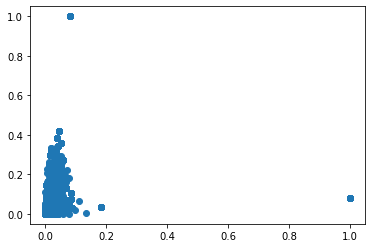

In [61]:
x=output_df_full_t[5]
y=output_df_full_t[7]
plt.scatter(x,y)
plt.show()

In [48]:
x

pandas.core.series.Series

In [ ]:
# Extract features from full data

In [104]:
feature_full = extract_sim_features(output_dict_full)
feature_full

{'204f5d99-c9de-4bce-ae2f-5e98085b4930': {'mean': 0.013305338,
  'median': 0.011303542,
  'std': 0.011560225,
  'max': 0.26414025,
  'min': 0.0,
  '80_perc': 0.022030849009752274,
  '60_perc': 0.014450707286596297,
  '40_perc': 0.008685882203280926,
  '20_perc': 0.0020907253492623568,
  'num_over0.5': 0,
  'num_over0.75': 0},
 '0526bd0d-41bb-43fe-bdc9-dabeea9dcfaa': {'mean': 0.012054443,
  'median': 0.008187439,
  'std': 0.021632528,
  'max': 1.0000001,
  'min': 0.0,
  '80_perc': 0.018015224114060407,
  '60_perc': 0.011168166995048523,
  '40_perc': 0.00624614879488945,
  '20_perc': 0.0017318026861175896,
  'num_over0.5': 13,
  'num_over0.75': 12},
 '33e5aa3f-af33-461d-9e51-16a552e6b985': {'mean': 0.021214087,
  'median': 0.014893764,
  'std': 0.030419957,
  'max': 1.0,
  'min': 0.0,
  '80_perc': 0.03068486787378788,
  '60_perc': 0.01896268129348755,
  '40_perc': 0.011593402363359928,
  '20_perc': 0.004136757459491491,
  'num_over0.5': 14,
  'num_over0.75': 14},
 'd10f9f69-204a-422d-886

In [105]:
feature_full_df = pd.DataFrame.from_dict(feature_full)

feature_full_t = feature_full_df.T
feature_full_t

[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>


,mean,median,std,max,min,80_perc,60_perc,40_perc,20_perc,num_over0.5,num_over0.75
204f5d99-c9de-4bce-ae2f-5e98085b4930,0.013305,0.011304,0.011560,0.264140,0.0,0.022031,0.014451,0.008686,0.002091,0.0,0.0
0526bd0d-41bb-43fe-bdc9-dabeea9dcfaa,0.012054,0.008187,0.021633,1.000000,0.0,0.018015,0.011168,0.006246,0.001732,13.0,12.0
33e5aa3f-af33-461d-9e51-16a552e6b985,0.021214,0.014894,0.030420,1.000000,0.0,0.030685,0.018963,0.011593,0.004137,14.0,14.0
d10f9f69-204a-422d-886d-ff59f787fe22,0.017598,0.014486,0.024820,1.000000,0.0,0.027856,0.017012,0.010814,0.003365,15.0,15.0
88ffc85f-b495-4f59-af53-08a92030f9b7,0.021345,0.014736,0.034865,1.000000,0.0,0.029668,0.018462,0.011609,0.003970,18.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
8dd1f569-7c3f-43c4-9c26-1543d89e032c,0.010133,0.008197,0.009749,0.105019,0.0,0.016774,0.010169,0.005962,0.001125,0.0,0.0
7fca5388-231e-4206-a5b2-7d3cd765ba80,0.002134,0.000000,0.008583,0.238918,0.0,0.001222,0.000000,0.000000,0.000000,0.0,0.0
f351f646-e3de-4b17-a457-c32741aafda0,0.004636,0.000508,0.019196,0.211438,0.0,0.002375,0.000857,0.000219,0.000000,0.0,0.0
f2cb35b3-1f70-471e-8bae-207f157c6cdf,0.008751,0.000600,0.032534,0.306241,0.0,0.003739,0.001076,0.000236,0.000000,0.0,0.0


In [106]:
feature_full_t.to_csv("sim_score_feature_v2.csv")

In [ ]:


def cal_similarity_score(data):
    '''
    Calculate similarity scores with given articles
    '''
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("Current Time =", current_time)

    # data = get_json_data('data.json')
    article_dict = {}
    article_lst = []

    for uid, info in data.items():
        article_dict[uid] = {}
        text = info['text']
        doc, token_lst = tokenize_text(text)
        article_dict[uid]["token"] = token_lst
        article_lst.append(token_lst)

    dictionary = corpora.Dictionary(article_lst)
    corpus = [dictionary.doc2bow(article) for article in article_lst]
    tfIdf_model = models.TfidfModel(corpus)

    index = similarities.SparseMatrixSimilarity(tfIdf_model[corpus], num_features=len(dictionary.keys()))
    for uid, info in article_dict.items():
        compared_bow = dictionary.doc2bow(info['token'])
        sim = index[tfIdf_model[compared_bow]]
        article_dict[uid]["sim_score"] = sim

    output_dict = {}
    for uid, info_dict in article_dict.items():
        output_dict[uid] = info_dict['sim_score']

    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("Current Time =", current_time)

    return output_dict

Reference: 
https://statsmaths.github.io/stat289-f18/solutions/tutorial19-gensim.html

https://blog.csdn.net/jay_1979/article/details/88187640?utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromMachineLearnPai2%7Edefault-1.pc_relevant_baidujshouduan&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7EBlogCommendFromMachineLearnPai2%7Edefault-1.pc_relevant_baidujshouduan